# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader, DataMultiverse
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date, WidgetCheckbox

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'SEQ',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('SEQ')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
PM.review_universe('UV_WTR')
#PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'path': 'data'}

In [8]:
#PM.review_universe('UV_FUND')
PM.review_portfolio('TDF_2406', universe=True)

{'universe': 'fund',
 'file': 'funds_prices',
 'tickers': 'funds_info',
 'freq': 'daily',
 'batch_size': 100,
 'check_master': True,
 'path': 'data'}

In [9]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_250707.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
261240    0.004209
329750    0.004209
440650    0.004209
Name: buy, dtype: float64

# Universe

In [4]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FNDM, UV_FCTR, UV_MCR


In [5]:
WidgetUniverse

## K200

In [6]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded


In [7]:
#k200.portfolio_data
#k200.get_names()

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
)
k200.download(**kw) if WidgetUniverse['Download'] else None

... done
200 securities from 2022-01-03 to 2025-07-21 downloaded.
kospi200_prices_250721.csv saved
Execution time of download: 35 secs


## WTR

In [9]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded


In [10]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [11]:
#PM.review_universe('UV_WTR')

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse['Download'] else None

... done
6 securities from 2022-01-03 to 2025-07-21 downloaded.
etfs_weather_250721.csv saved
Execution time of download: 1 secs


In [13]:
#wtr.save()

## ETF

In [14]:
tickers = [
    '261240', '292560'
]

In [15]:
etf = PM.create_universe('UV_ETF')

2 securities from 2016-12-27 to 2025-07-18 uploaded.
Price data loaded


In [16]:
etf.get_names('selected')

0) 292560: TIGER 일본엔선물
1) 261240: KODEX 미국달러선물

In [17]:
#PM.review_universe('UV_WTR')

In [18]:
kw = dict(
    #n_years=3, 
    n_years=10, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    tickers = tickers
    #tickers = 'selected'
)
etf.download(**kw) if WidgetUniverse['Download'] else None

... done
2 securities from 2016-12-27 to 2025-07-21 downloaded.
etfs_all_250721.csv saved
Execution time of download: 0 secs


## FUND

In [6]:
fund = PM.create_universe('UV_FUND')
fund_names = fund.get_names()

40 securities from 2023-03-29 to 2025-07-18 uploaded.
Master data for 329 funds loaded.
Price data loaded


In [7]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, verbose=False)
tickers = pm.util_performance_by_asset().index.to_list()
#tickers = None
len(tickers)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


28

In [8]:
# FISA
tickers += ['K55105CH3411', 'K55223BU8809', 'K55105BU7648', 'K55301BX0493', 'K55235CI9634',
            'K55306BT9453', 'K55236BG3001', 'K55101E95114', 'K55101E95247', 'K55235B96163', 'KR5235AK9691', 'K55236BG3274']
tickers += ['K55365BT3694', 'KR5363AC3714', 'K55364BU0797', 'K55234BX9892', 'K55105BV6805', 'KR5236267161']
tickers += ['K55301BU6139',  'K55365BT3694',  'KR5101888398', 'KR5370AP9956', 'K55234DF3150', 'K55213C50702', 'K55107BU0252',
 'K55206C11278', 'K55214B30803', 'K55306BT9453', 'KR5235AK9691', 'K55105BU7648', 'K55105CH3411', 'K55223BU8809', 'K55301BX0493',
 'K55301CC8789', 'K55101BV9571', 'K55214CD4825', 'K55107BB0404', 'KR5370AP9949', 'K55235CI9634', 'K55105BV6805', 'K55234BX9892',
 'K55364BU0797', 'KR5236267161', 'KR5363AC3714']
tickers = list(set(tickers))
len(tickers)

42

In [9]:
kw = dict(
    start_date = '2024-06-01',
    #n_years = 10,
    #close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'], backup_path = 'del',
    tickers = tickers,
    timeout = 5
)
fund.download(**kw) if WidgetUniverse['Download'] else None

Master data for 329 funds loaded.
42 tickers set to download


100%|███████████████████████████████████████████████████████████████| 42/42 [03:14<00:00,  4.64s/it]

2 tickers failed for conversion
... done
40 securities from 2023-03-29 to 2025-07-21 downloaded.
funds_prices_250721.csv saved
Execution time of download: 3 mins


In [21]:
#_ = fund.save()

In [24]:
#fund.portfolio_data['universe']

### Master

In [122]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')
df_cat.tail()

,name,seller,account,manager,asset,strategy,region
ticker,,,,,,,
K55364BU0797,에셋플러스코리아리치투게더퇴직연금증권자투자신탁 1[주식]종류Ce,기업은행,퇴직연금,에셋플러스,주식,주식,국내
K55105BV6805,삼성퇴직연금액티브증권자투자신탁 1[주식]Ce,기업은행,퇴직연금,삼성,주식,주식,국내
K55234BX9892,IBK퇴직연금한국대표증권자투자신탁[주식]종류C-e,기업은행,퇴직연금,IBK,주식,주식,국내
KR5363AC3714,트러스톤장기성장퇴직연금증권자투자신탁[주식]Ce클래스,기업은행,퇴직연금,트러스톤,주식,주식,국내
KR5236267161,한국밸류10년투자퇴직연금증권자투자신탁 1(주식)(C-E),기업은행,퇴직연금,한국밸류,주식,주식,국내


In [123]:
# daily
freq, batch_size = 'daily', 100
file_master = 'funds_info'
file_history = 'funds_prices'

In [105]:
# monthly
freq, batch_size = 'monthly', 24
file_master = 'fundm_info'
file_history = 'fundm_prices'

In [130]:
kw = dict(
    freq=freq, batch_size=batch_size,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*Check missing tickers in category*

In [131]:
df = fd.data_tickers.copy()
tkrs = df_cat.index.difference(df.index)
tkrs.nunique()

5

In [132]:
# uncomment to update data_tickers with category
fd.data_tickers = pd.concat([df, df_cat.loc[tkrs, 'name']])

In [133]:
overwrite=False
#overwrite=True # update all conversion data
fd.update_master(overwrite=overwrite)

100%|███████████████████████████████████████████████████████████████| 15/15 [00:04<00:00,  3.67it/s]


4.1 secs elapsed, 0.0 secs paused (0.0%)


100%|█████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.14it/s]

0.5 secs elapsed, 0.0 secs paused (0.0%)
funds_info_250707.csv saved


### Monthly

In [4]:
fund = PM.create_universe('UV_FNDM')

323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


In [6]:
fund.cleanup(dry_run=False)

3 files before 'fundm_prices_250130.csv' deleted


In [112]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse['Closed'],
    #tickers='selected',
    append=True # download new tickers to update existing data
)
fund.download(**kw) if WidgetUniverse['Download'] else None

Master data for 323 funds loaded.
Update existing data with 8 tickers
8 tickers set to download


100%|█████████████████████████████████████████████████████████████████| 8/8 [01:20<00:00, 10.07s/it]

... done
323 securities from 2005-01-31 to 2025-03-31 downloaded.
ERROR: failed to save as fundm_prices_250331.csv exists
Execution time of download: 81 secs


In [113]:
_ = fund.save()

fundm_prices_250331.csv saved


### Cost

*Check missing cost data*

In [12]:
universe = 'UV_FUND'
#universe = 'UV_FNDM'

In [13]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250620.csv loaded
33 securities from 2023-03-29 to 2025-07-04 uploaded.
Master data for 329 funds loaded.
Price data loaded


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [14]:
fund = PM.create_universe(universe)
fd = FundDownloader.create(fund)
fd.export_cost(universe, file_cost, path=path_tran, update=True)
#fd.export_cost(universe)

33 securities from 2023-03-29 to 2025-07-04 uploaded.
Master data for 329 funds loaded.
Price data loaded
Master data for 329 funds loaded.
Cost data transaction_cost_250620.csv loaded
Cost data saved to transaction_cost_250707.csv


### Direct

In [4]:
file_master = 'funds_info_250325'
file_history = 'funds_prices_250326.csv'
kw = dict(
    freq='daily', batch_size=100,
    check_master=True, 
    path = path_data, msg=False,
)
fd = FundDownloader(file_master, file_historical=file_history, **kw)

*check missing tickers*

In [5]:
import pandas as pd
file = 'funds_categories.csv'
df_cat = pd.read_csv(f'{path_data}/{file}').set_index('ticker')

#cond = df_cat['seller'] == '기업은행'
#cond = cond & (df_cat['account'] == '일반')
#tickers = df_cat.index[cond]
tickers = df_cat.index
tickers.difference(fd.data_tickers.index)

Index([], dtype='object', name='ticker')

In [15]:
tickers = None
fd.set_tickers(tickers=tickers)

242 tickers set to download


In [ ]:
start_date, end_date = '2024-01-01', '2025-03-25'
_ = fd.download(start_date, end_date)

In [17]:
fd.df_prices.columns.size

232

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [7]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)

40 securities from 2023-03-29 to 2025-07-08 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [8]:
import random
tickers = random.sample(list(fund.df_prices.columns), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
#tickers = ['K55307DH1659', 'K55210E77483']
#tickers = ['K55105CH3411']

In [9]:
fund.get_names(tickers)

0) K55364CF7048: 에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e
1) K55213C50702: 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)
2) K55101BV9571: 한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)

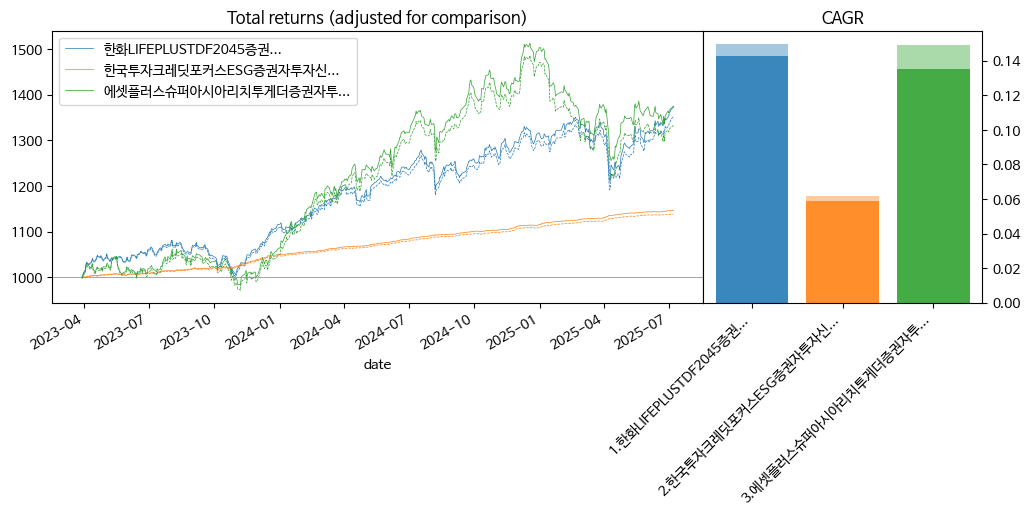

In [10]:
fund.plot(tickers, cost=cost, base=1000)

In [11]:
fund.performance(tickers, metrics=METRICS, sort_by='cagr')

,K55213C50702,K55364CF7048,K55101BV9571
start,2023-03-29,2023-03-29,2023-03-29
end,2025-07-08,2025-07-08,2025-07-08
total_return,0.374674,0.37313,0.145946
cagr,0.149926,0.149359,0.06163
calmar,1.440074,0.876721,12.284143
max_drawdown,-0.10411,-0.170361,-0.005017
avg_drawdown,-0.013521,-0.020082,-0.000609
avg_drawdown_days,17.384615,22.125,3.905263
daily_vol,0.091183,0.116828,0.009993
daily_sharpe,1.630663,1.29118,6.195889


## KRX

In [9]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse['Download'] else None

## FCTR

In [12]:
tickers = ['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
fctr = PM.create_universe('UV_FCTR', tickers=tickers)

7 securities from 2022-01-03 to 2025-03-25 uploaded.
ERROR: Failed to get ticker names as Too Many Requests. Rate limited. Try after a while.
Price data loaded


In [7]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [8]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    #tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse['Download'] else None

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2022-01-03 to 2025-03-25 downloaded.
etfs_factors_250325.csv saved
df_prices updated
Execution time of download: 2 secs


## LIQ

In [6]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [7]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded


In [10]:
liq.cleanup(dry_run=False)

58 files before 'krx_liq_prices_250521.csv' deleted


In [17]:
#liq.get_names()

In [19]:
kw = dict(
    n_years = 3, 
    tickers = selected, #selected,
    close_today = WidgetUniverse['Closed'],
    overwrite = WidgetUniverse['Overwrite'],
    cleanup = WidgetUniverse['Cleanup'],
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse['Download'] else None

ERROR: Failed to get ticker names
Execution time of download: 11 secs


## Additional Data

### Cost

*Check missing cost data*

In [4]:
#universe = 'UV_FUND'
universe = 'UV_FNDM'

In [5]:
_ = PM.check_cost(universe, file_cost, path_tran)

Cost data transaction_cost_250707.csv loaded
323 securities from 2005-01-31 to 2025-03-31 uploaded.
Master data for 323 funds loaded.
Price data loaded


*Remove older cost files*

In [8]:
from pf_utils import DataManager
#dry_run = True
dry_run = False

DataManager.cleanup_files(file_cost, path_tran, dry_run=dry_run)

5 files before 'transaction_cost_250425.csv' deleted


### Financial Ratio

In [4]:
WidgetUniverse

In [5]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-06-27 loaded


In [7]:
start_fr = '2024-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse['Download']:
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse['Closed'],
        cleanup = WidgetUniverse['Cleanup'],
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [07:30<00:00,  2.25s/it]

7.5 mins elapsed, 16.0 secs paused (3.5%)
Financial ratios of 200 stocks from 2024-01-02 to 2025-07-09 downloaded
kospi200_ratios_250709.csv saved
18 files before 'kospi200_ratios_250425.csv' deleted


In [8]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [9]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-07-10 uploaded.
Price data loaded
Ratio: 2024-01-02 ~ 2025-07-09
Price: 2022-01-03 ~ 2025-07-10


# Performance

In [4]:
PM.review()

Portfolio: MMT_2407, PER_2410, PER_2505, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, SAVE_2503, FISA_2504, FCTR


In [5]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250716.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per_241112.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per2_250512.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250214.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [6]:
pfs = {
    'SRT': ['pf_srt_static', 'UV_WTR'], 
    'SDS': ['pf_sds_static', 'UV_K200'], 
    #'FXM': ['pf_fxm_static', 'UV_ETF']
}
for p, (f, u) in pfs.items():
    pfs[p] = PM.create_portfolio(p, file=f, universe=u, strategy='SEQ', path=path_tran, **kw_cost)

6 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_srt_static_250714.csv loaded
200 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_sds_static_250714.csv loaded


In [7]:
#pm.load('LIQ')
#pm.load(pf_srt, pf_sds, pf_fxm)
pm.load(*pfs.values())

SRT: imported
SDS: imported


security_names updated
Data of tickers 009900, 016380 downloaded
security_names updated
Data of tickers 001740, 178920 downloaded


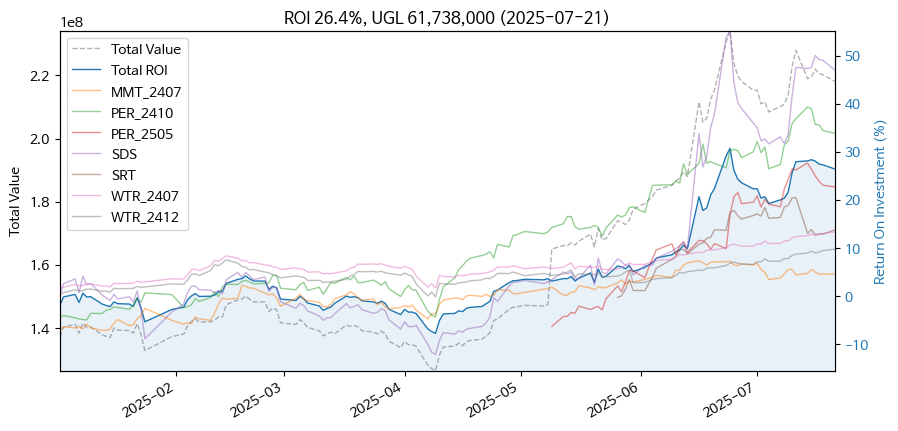

In [8]:
start_date='2025-01-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=True)

In [12]:
pm.set_benchmark('069500', '2020-01-01', name='BM:KOSPI200')

069500 set as benchmark


In [9]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [13]:
pm.summary(date=w_date.value, exclude_cost=False)

,MMT_2407,PER_2410,PER_2505,SDS,SRT,WTR_2407,WTR_2412,TOTAL,BM:KOSPI200
start,2024-07-22,2024-10-17,2025-05-09,2025-01-02,2025-05-26,2024-07-18,2024-12-18,2024-07-18,2024-07-18
end,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21
buy,"77,796,016","16,472,520","17,985,251","97,106,466","3,449,435","10,251,579","10,516,562","233,577,830","22,345,552"
sell,"62,583,405","2,617,050",0.0,"11,015,714",0.0,"942,797",0.0,"77,158,966",0
value,"18,778,862","19,431,827","22,071,909","131,728,836","3,924,691","10,677,216","11,543,728","218,157,069","25,564,355"
ugl,"3,566,250","5,576,357","4,086,658","45,638,084","475,256","1,368,435","1,027,166","61,738,205","3,218,803"
roi,0.0458,0.339,0.227,0.47,0.138,0.133,0.0977,0.264,0.144


In [14]:
pm.performance_stats(sort_by='yearly_sharpe', simulation=False)

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe
Returning Actual performance:


,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,SRT,SDS,BM:KOSPI200
start,2024-07-23,2024-10-18,2025-05-12,2024-07-19,2024-12-19,2025-05-27,2025-01-03,2024-07-19
end,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21
total_return,-0.009063,0.61305,0.28108,0.14507,0.109337,0.137037,0.432416,0.157688
cagr,-0.009119,0.88276,2.641814,0.14433,0.19375,1.346356,0.933986,0.15688
calmar,-0.030273,10.614084,68.120152,2.323085,2.71007,21.030008,5.73985,0.832116
max_drawdown,-0.301226,-0.083169,-0.038782,-0.062129,-0.071493,-0.064021,-0.16272,-0.188532
avg_drawdown,-0.168899,-0.02306,-0.015767,-0.010301,-0.009293,-0.021644,-0.057048,-0.040279
avg_drawdown_days,178.5,8.956522,4.3,17.166667,15.181818,4.5,15.727273,56.333333
monthly_vol,0.121195,0.252443,0.267077,0.052418,0.064437,0.439507,0.42947,0.199997
monthly_sharpe,1.219751,2.752331,3.648559,2.749435,2.450026,1.75102,2.173132,0.869743


Custom category loaded: portfolio2


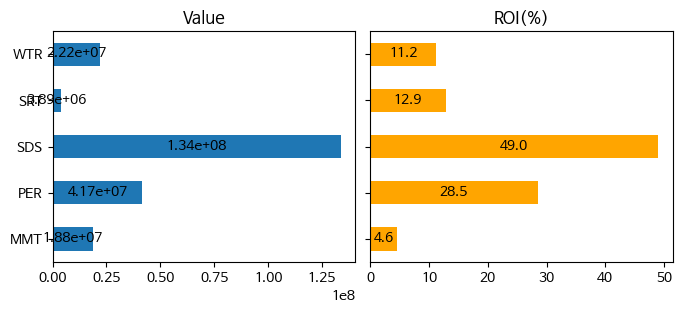

In [17]:
# custome category of portfolio type
df = pm.util_performance_by_asset()
sr = df.assign(portfolio2=lambda x: x['portfolio'].str.split('_').str[0])[['portfolio','portfolio2']]
pm.import_category(sr)

pm.summary(category='portfolio2', plot=True, figsize=(8,3))

*diversification metrics*

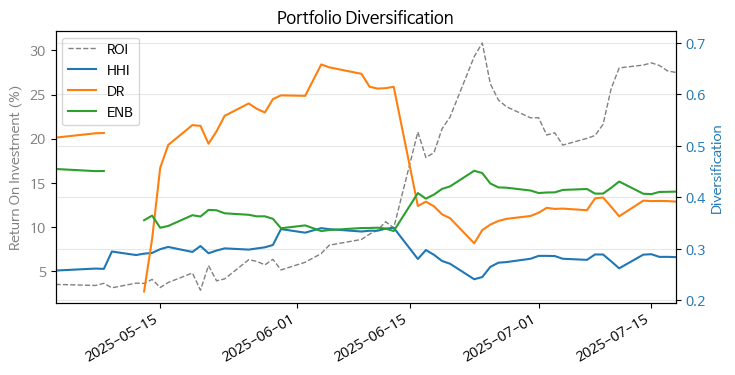

In [18]:
pfs = ['MMT', 'PER', 'WTR', 'SDS']
pm.diversification_history(*pfs, start_date='2025-05-01')

*print summary for google sheet 금융자산운용*

In [19]:
pm.util_print_summary(date=w_date.value)

2025-07-18, MMT, 2407, , , , 평가, , 77796016, 62583405, 18786648, 3574036, 0.0459
2025-07-18, PER, 2410, , , , 평가, , 16472520, 2617050, 19521902, 5666432, 0.344
2025-07-18, PER, 2505, , , , 평가, , 17985251, 0.0, 22129663, 4144412, 0.23
2025-07-18, SDS, , , , 평가, , 97106466, 11015714, 133669195, 47578443, 0.49
2025-07-18, SRT, , , , 평가, , 3449435, 0.0, 3893250, 443815, 0.129
2025-07-18, WTR, 2407, , , , 평가, , 10251579, 942797, 10647673, 1338892, 0.131
2025-07-18, WTR, 2412, , , , 평가, , 10516562, 0.0, 11512500, 995938, 0.0947


### All Funds

In [15]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported


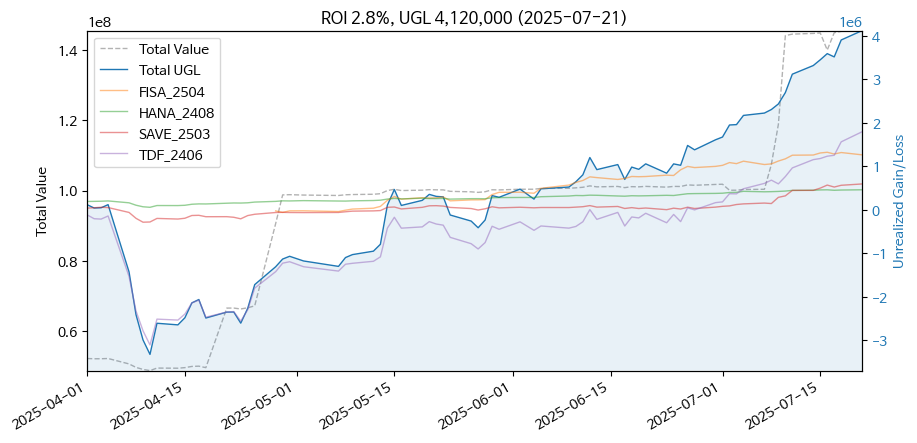

In [16]:
start_date='2025-04-01'
pm.plot(start_date=start_date, roi=False)

In [17]:
pm.set_benchmark('069500', '2020-01-01', name='BM:KOSPI200')

069500 set as benchmark


In [18]:
pm.summary()

,FISA_2504,HANA_2408,SAVE_2503,TDF_2406,TOTAL,BM:KOSPI200
start,2025-04-28,2024-08-01,2025-03-17,2024-06-19,2024-06-19,2024-06-19
end,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21
buy,"36,176,035","9,990,000","22,649,487","79,392,555","148,208,077","35,358,575"
sell,"4,968,115",0.0,"1,975,860","-170,199","6,773,775",0
value,"32,472,934","10,452,240","21,270,010","81,358,837","145,554,021","41,164,362"
ugl,"1,265,014","462,240","596,383","1,796,083","4,119,719","5,805,786"
roi,0.035,0.0463,0.0263,0.0226,0.0278,0.164


In [19]:
pm.performance_stats(sort_by='yearly_sharpe', simulation=True)

Returning Simulated performance using the most recent transaction weights:


,HANA_2408,FISA_2504,SAVE_2503,TDF_2406,BM:KOSPI200
start,2023-03-29,2023-03-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-21,2025-07-21,2025-07-21,2025-07-21,2025-07-21
total_return,0.173052,0.333508,0.333839,0.365939,0.441867
cagr,0.071426,0.132476,0.132598,0.1443,0.171373
calmar,3.957036,2.440122,1.692192,1.99631,0.793262
max_drawdown,-0.01805,-0.054291,-0.078359,-0.072283,-0.216036
avg_drawdown,-0.002315,-0.006284,-0.009806,-0.00785,-0.027506
avg_drawdown_days,9.603175,12.181818,16.44186,11.491228,26.034483
monthly_vol,0.024714,0.054773,0.070516,0.053699,0.181585
monthly_sharpe,2.750127,2.248014,1.749365,2.476947,0.909346


In [98]:
file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
category = 'asset'

Custom category loaded: account, asset, manager, region, seller, strategy


In [20]:
file = 'funds_custom_category_250711b.csv'

# uncomment to save all tickers and their names in custom category file
#df = pm.util_performance_by_asset()
#df['name'].rename('name2').drop_duplicates().sort_values().to_csv(f'{path_data}/{file}')

pm.import_category(file, path_data)
category = 'name2'

Custom category loaded: name2


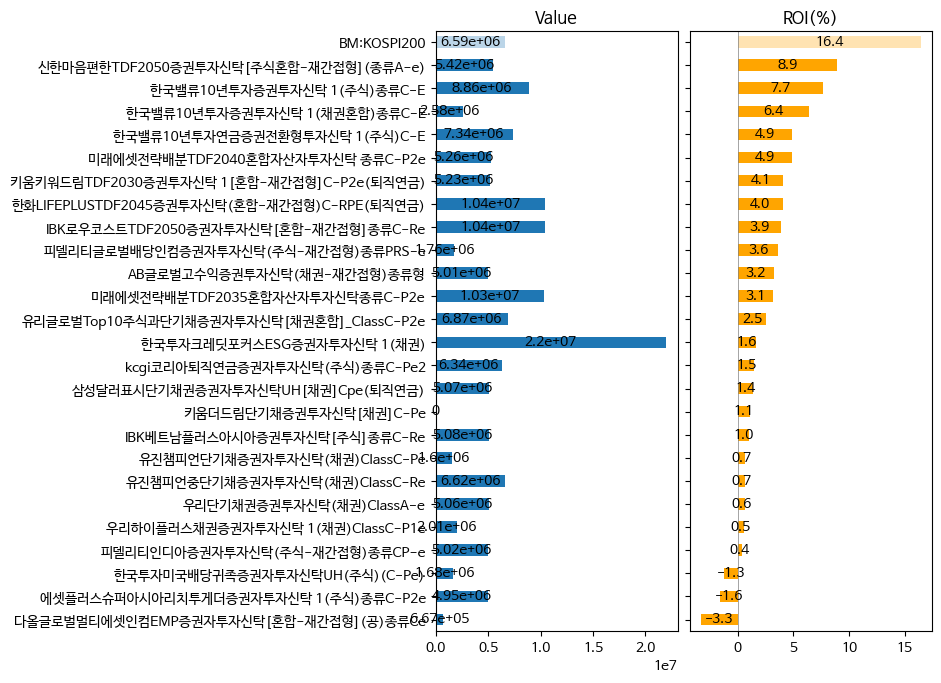

In [21]:
pm.summary(category=category, plot=True, roi=True, sort_by='roi')

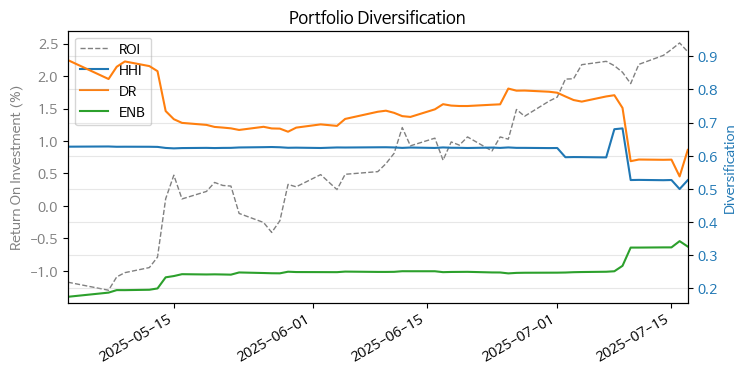

In [29]:
pm.diversification_history(start_date='2025-05-01')

In [10]:
pm.util_print_summary()

2025-06-02, FISA, 2504, , , , 평가, , 30960600, -251.0, 31380619, 419768, 0.0136
2025-06-02, HANA, 2408, , , , 평가, , 9990000, 0.0, 10275815, 285815, 0.0286
2025-06-02, SAVE, 2503, , , , 평가, , 10652630, -3481, 10726229, 70118, 0.00658
2025-06-02, TDF, 2406, , , , 평가, , 48148612, -103068, 48043823, -207857, -0.00432


# Research

## Search

In [16]:
#universe = 'UV_FUND'
#universe = 'UV_K200'
universe = 'UV_ETF'
dm = DataMultiverse(universe)

UV_ETF:
2 securities from 2016-12-27 to 2025-07-15 uploaded.
Price data loaded



In [47]:
dm.get_names(search='금융')

0) 494900(etf): TIGER 25-12 금융채(AA-이상)
1) 498410(etf): KODEX 금융고배당TOP10타겟위클리커버드콜
2) 463290(etf): 1Q 단기금융채액티브
3) 484880(etf): SOL 금융지주플러스고배당
4) 453650(etf): KODEX 미국S&P500금융
5) 336160(etf): RISE 금융채액티브
6) 139270(etf): TIGER 200 금융
7) 498860(etf): RISE 코리아금융고배당
8) 0028X0(etf): KODEX 미국금융테크액티브
9) 284980(etf): RISE 200금융

## Data

In [58]:
n_years = 20

In [59]:
cb = WidgetCheckbox('Download', 'Append', as_accessor=True)
cb

### ETF

In [54]:
file = 'research_etf'
universe = 'UV_ETF'
retf = PM.create_universe(universe, file=file)
cetf = PM.get_cost(universe, file=file_cost, path=path_tran)

4 securities from 2013-04-25 to 2025-07-14 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [48]:
tickers = ['498400', '498410', '069500', '498860']
retf.download(tickers=tickers, n_years=n_years, overwrite=True) if cb['Download'] else None

... done
4 securities from 2013-04-25 to 2025-07-14 downloaded.
research_etf_250714.csv saved
Execution time of download: 1 secs


### FUND

In [65]:
file = 'research_fund'
universe = 'UV_FUND'
rfnd = PM.create_universe(universe, file=file)
cfnd = PM.get_cost(universe, file=file_cost, path=path_tran)

35 securities from 2008-12-01 to 2025-07-17 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded


In [56]:
#tickers = ['K55301BU6253', 'K55206C95800', 'K55210CO3737']
tickers = ['K55210BR6613', 'K55210BR6654', 'K55210BR6480', 'K55210BR6522', 'K55210CO3737', 'K55210CO3760']

rfnd.get_names(tickers)

0) K55306BT9453: 다올중국1등주증권자투자신탁[주식]종류C-Pe
1) KR5235AK9691: 피델리티유럽증권자투자신탁(주식-재간접형)PRS-e
2) KR5235AK9808: 피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e

In [62]:
tickers = rfnd.get_names('selected')
tickers = list(tickers.keys())

In [63]:
len(tickers)

35

In [64]:
rfnd.download(tickers=tickers, n_years=n_years, overwrite=True, append=cb['Append']) if cb['Download'] else None

Master data for 329 funds loaded.
35 tickers set to download


100%|███████████████████████████████████████████████████████████████| 35/35 [04:27<00:00,  7.63s/it]

... done
35 securities from 2008-12-01 to 2025-07-17 downloaded.
research_fund_250717.csv saved
Execution time of download: 4 mins


### MACRO

In [16]:
file = 'research_macro'
universe = 'UV_MCR'
rmcr = PM.create_universe(universe, file=file)

2 securities from 2004-12-31 to 2025-07-02 uploaded.
Price data loaded


In [40]:
tickers=['USD/KRW', '^NYICDX']
rmacro.download(tickers=tickers, n_years=n_years, overwrite=True) if cb['Download'] else None

## Compare

In [ ]:
univ = ['ETF', 'FUND', 'MCR']
inst = [retf, rfnd, rmcr]
cost = [cetf, cfnd]
dm = DataMultiverse(*zip(univ, inst))
dm.set_cost(dict(zip(univ[:-1], cost)))

In [66]:
dm = DataMultiverse(('fund', rfnd))
dm.set_cost({'fund':cfnd})

fund: imported
Cost of fund loaded


In [55]:
dm = DataMultiverse(('etf', retf))
dm.set_cost({'etf':cetf})

etf: imported
Cost of etf loaded


In [67]:
#tickers = ['K55306BT9453', 'K55301BX0493', 'KR5235AK9691', 'K55223BU8809', 'K55105BU7648', 'K55235CI9634']
#tickers = ['K55306BT9453', 'K55301BX0493'] # china
#tickers = ['KR5235AK9691', 'K55223BU8809'] # eu
#tickers = ['K55105BU7648', 'K55235CI9634'] # india
#tickers = ['K55365BT3694', 'KR5363AC3714', 'K55364BU0797', 'K55234BX9892', 'K55105BV6805', 'KR5236267161'] # korea
#tickers = ['K55107BB0404', 'KR5101888398']
#tickers = ['498400', '498410', '069500']
tickers = ['KR5235AK9808', 'K55306BT9453', 'KR5235AK9691'] # SAVE 250721
#tickers = None

In [24]:
portfolios_fund = ['TDF','HANA','SAVE', 'FISA']
pm = PM(*portfolios_fund, **kw_cost, verbose=False)

file = 'funds_categories.csv'
pm.import_category(file, path_data, exclude='name')
#tickers = pm.util_performance_by_asset(category='asset:채권').index
tickers = pm.util_performance_by_asset(category='strategy:TDF').index

TDF_2406: imported
HANA_2408: imported
SAVE_2503: imported
FISA_2504: imported
Custom category loaded: account, asset, manager, region, seller, strategy


In [68]:
#dm.get_names('selected')
dm.get_names(tickers)

0) K55306BT9453(fund): 다올중국1등주증권자투자신탁[주식]종류C-Pe
1) KR5235AK9691(fund): 피델리티유럽증권자투자신탁(주식-재간접형)PRS-e
2) KR5235AK9808(fund): 피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e

In [57]:
# run to check missing tickers
#dm.get_prices(tickers)

In [69]:
dm.performance(tickers, sort_by='cagr:5')

,KR5235AK9808(fund),KR5235AK9691(fund),K55306BT9453(fund)
start,2014-07-21,2014-01-06,2017-10-10
end,2025-07-17,2025-07-17,2025-07-17
total_return,1.316834,1.229995,0.349963
cagr,0.079452,0.072057,0.039389
calmar,0.27997,0.239099,0.063294
max_drawdown,-0.283787,-0.301371,-0.622329
avg_drawdown,-0.017016,-0.023187,-0.055642
avg_drawdown_days,25.971014,35.59633,98.321429
monthly_vol,0.108373,0.14395,0.255668
monthly_sharpe,0.757057,0.573162,0.240836


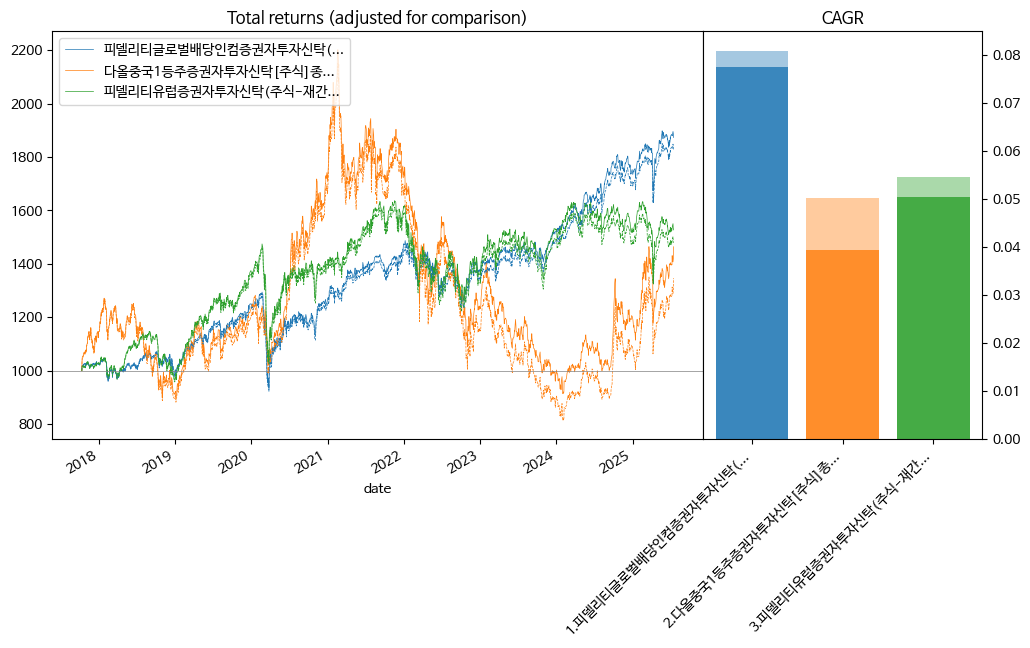

In [70]:
tkrs = tickers
#tkrs = ['K55210CO3737', 'K55210CO3760', 'K55210BR6613', 'K55210BR6654']
dm.plot(tkrs, base=1000, figsize=(12,6))

# Transaction

## MMT

In [16]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250716.csv loaded


In [30]:
# run after editting record file
update = False
#update = True
pf_mmt.update_record() if update else None

In [31]:
pf_mmt.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                         
2025-07-16 000150         두산  590000           -6    0     0.0    0.000   
           000880         한화   93750            2   42     0.2    0.205   
           012450  한화에어로스페이스  854000            0    4     0.2    0.178   
           012630        HDC   21950          180  180     0.2    0.208   
           064350       현대로템  192500            0   20     0.2    0.201   
           329180    HD현대중공업  401500           -9    0     0.0    0.000   
           377300      카카오페이   65850           59   59     0.2    0.207   

                       date*  
date       ticker             
2025-07-16 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           012630 2025-07-17  
           064350 2025-07-17  
           329180 2025-07-17  
           377300 2025-07-17

*daily transactions for book keeping*

In [32]:
#pf_mmt.get_cash_history(cumsum=False, date_actual=True)

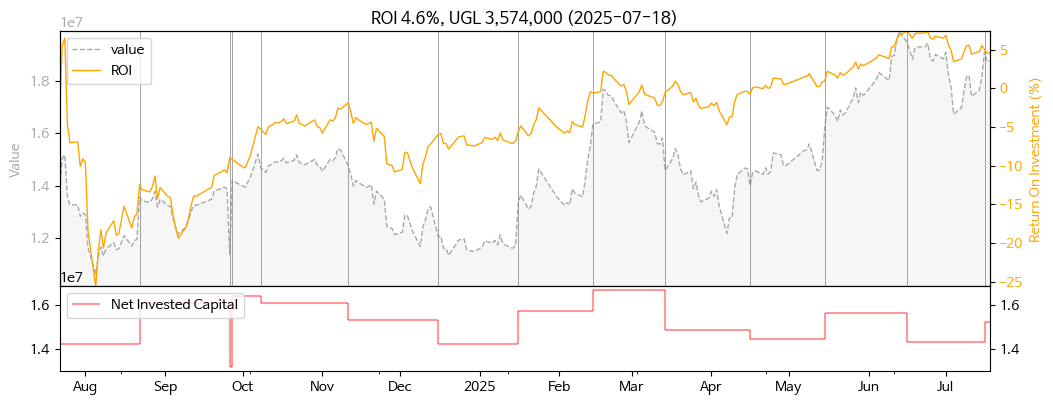

In [28]:
start_date = None
#start_date = '2025-01-01'
pf_mmt.plot(total=True, roi=True, start_date=start_date, figsize=(12,5))

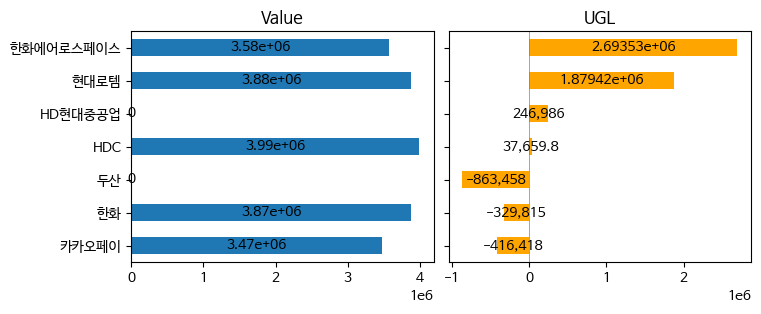

In [18]:
_ = pf_mmt.plot_assets(figsize=(8,3), exclude_sold=True, roi=False)

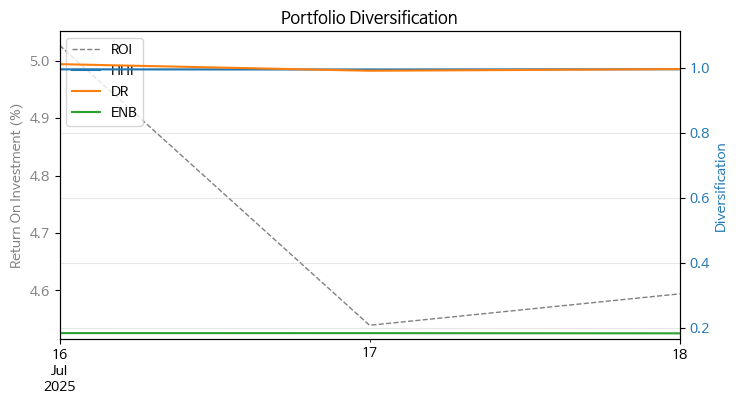

In [35]:
pf_mmt.diversification_history()

In [36]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-07-18, 77796016, 62583405, 18786650, 3574038, 0.0459


start    2024-07-22
end      2025-07-18
buy      77,796,016
sell     62,583,405
value    18,786,650
ugl       3,574,038
roi          0.0459
dtype: object

In [75]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kw = dict(
    #sell = {'000880': 2e6},
    date = WidgetTransaction[0],
    save = WidgetTransaction[2]
)
#_ = pf_mmt.transaction_halt(**kw) 

In [95]:
date_actual = '2025-07-17'
cleanup = False
capital = WidgetTransaction[1]
capital = 0.1
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    cleanup = cleanup,
    date_actual=date_actual
)
_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-07-09 to 2025-07-09
Weights of tickers determined by Equal weights.
Rebalancing with contribution 10% of the portfolio value (1,816,750)
Mean absolute error of weights: 4 %
Deployed capital: 991,600
ROI: 4.9%, UGL: 3,789,165 (2025-07-16)
All transactions saved to pf_k200_momentum_250716.csv


In [96]:
pf_mmt.view_record(-2, nshares=True)

name    price  transaction  net  weight  weight*  \
date       ticker                                                          
2025-06-16 000150         두산   598000            6    6     0.2    0.184   
           000880         한화   100400           40   40     0.2    0.206   
           003230       삼양식품  1277000           -3    0     0.0    0.000   
           012450  한화에어로스페이스   970000            0    4     0.2    0.199   
           042660       한화오션    85100          -42    0     0.0    0.000   
           064350       현대로템   198200          -10   20     0.2    0.204   
           329180    HD현대중공업   448000            1    9     0.2    0.207   
2025-07-16 000150         두산   590000           -6    0     0.0    0.000   
           000880         한화    93700            2   42     0.2    0.205   
           012450  한화에어로스페이스   854000            0    4     0.2    0.178   
           012630        HDC    22150          180  180     0.2    0.208   
           064350       현대로템   192500            0   20     0.2    0.201   
           329180    HD현대중공업   401500           -9    0     0.0    0.000   
           377300      카카오페이    67300           59   59     0.2    0.207   

                       date*  
date       ticker             
2025-06-16 000150 2025-06-17  
           000880 2025-06-17  
           003230 2025-06-17  
           012450 2025-06-17  
           042660 2025-06-17  
           064350 2025-06-17  
           329180 2025-06-17  
2025-07-16 000150 2025-07-17  
           000880 2025-07-17  
           012450 2025-07-17  
           012630 2025-07-17  
           064350 2025-07-17  
           329180 2025-07-17  
           377300 2025-07-17

## PER

In [8]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2024-01-02 to 2025-07-09 loaded


In [9]:
pf, date_actual, assets_old = 'PER_2410', '2025-11-12', ['017800']
#pf, date_actual, assets_old = 'PER_2505', '2026-05-12', ['015760']

pf_per = PM.create_portfolio(pf, df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per_241112.csv loaded
Run check_universe to get the list of missing assets


In [117]:
# run after editting record file
pf_per.update_record()

Transaction file pf_k200_per2_250512.csv updated
self.record updated


In [118]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-09 000210       DL   36075           24   24    0.05    0.048   
           000660   SK하이닉스  194750            4    4    0.05    0.045   
           001450     현대해상   22025           38   38    0.05    0.048   
           001740   SK네트웍스    4187          198  198    0.05    0.012   
           002710    TCC스틸   20350           41   41    0.05    0.048   
           003240     태광산업  851500            1    1    0.05    0.049   
           005250   녹십자홀딩스   13614           59   59    0.05    0.048   
           005830   DB손해보험   92050            9    9    0.05    0.048   
           006360     GS건설   18955           46   46    0.05    0.049   
           009240       한샘   42625           19   19    0.05    0.047   
           009970  영원무역홀딩스  100331            8    8    0.05    0.047   
           010060   OCI홀딩스   68250           12   12    0.05    0.048   
           015760     한국전력   21163          110  110     NaN    0.176   
           036460   한국가스공사   38125           21   21    0.05    0.047   
           047040     대우건설    3697          237  237    0.05    0.049   
           078930       GS   39225           21   21    0.05    0.048   
           088350     한화생명    2662          311  311    0.05    0.049   
           178920   PI첨단소재   17005           50   50    0.05    0.003   
           326030   SK바이오팜   87950            9    9    0.05    0.048   
           402340    SK스퀘어   94500            8    8    0.05    0.044   

                       date*  
date       ticker             
2025-05-09 000210 2025-05-12  
           000660 2025-05-12  
           001450 2025-05-12  
           001740 2025-05-12  
           002710 2025-05-12  
           003240 2025-05-12  
           005250 2025-05-12  
           005830 2025-05-12  
           006360 2025-05-12  
           009240 2025-05-12  
           009970 2025-05-12  
           010060 2025-05-12  
           015760 2025-05-12  
           036460 2025-05-12  
           047040 2025-05-12  
           078930 2025-05-12  
           088350 2025-05-12  
           178920 2025-05-12  
           326030 2025-05-12  
           402340 2025-05-12

In [119]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

security_names updated
Data of tickers 001740, 178920 downloaded
Tickers 001740, 178920 added to universe
start, end, buy, sell, value, ugl, roi
2025-05-09, 2025-07-16, 17985251, 0.0, 22476779, 4491528, 0.25


start    2025-05-09
end      2025-07-16
buy      17,985,251
sell            0.0
value    22,476,779
ugl       4,491,528
roi            0.25
dtype: object

In [120]:
#pf_per.update_record()
#pf_per.view_record(-2)

security_names updated
Data of tickers 009900, 016380 downloaded


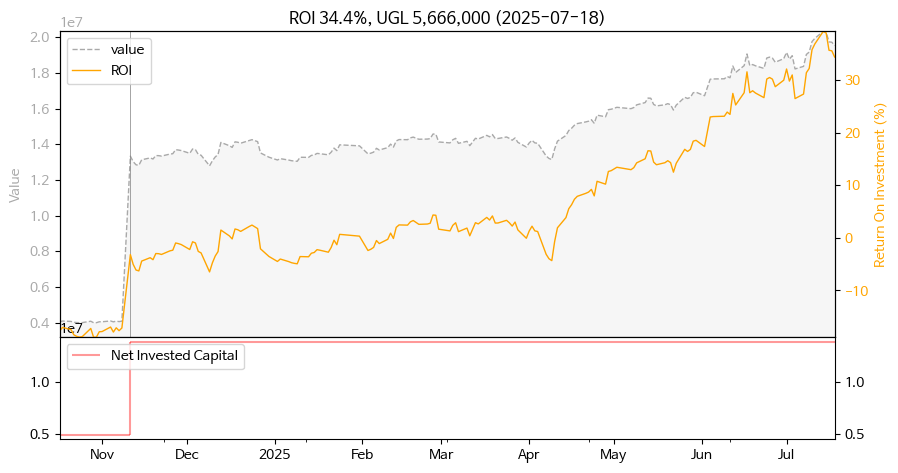

In [10]:
pf_per.plot()

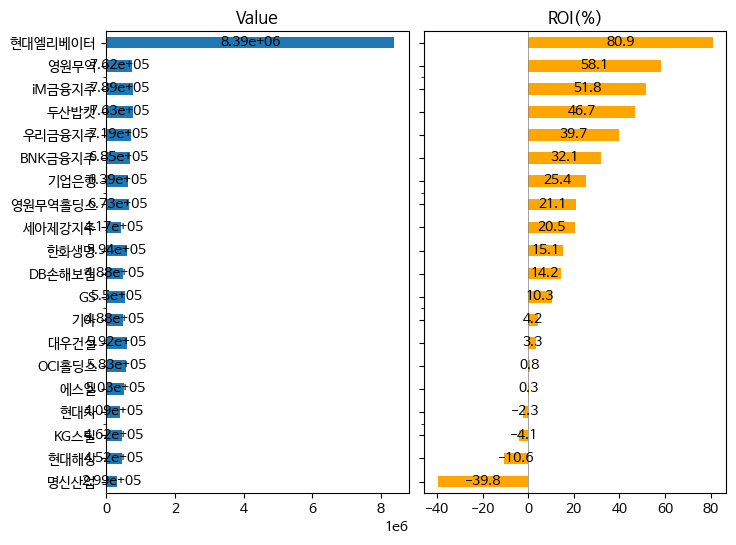

In [52]:
_ = pf_per.plot_assets(figsize=(8,6))

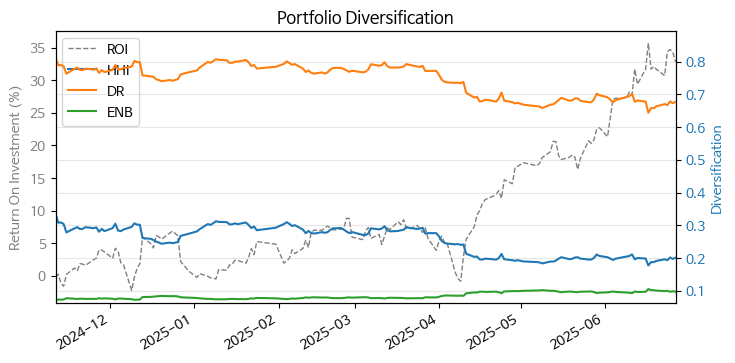

In [53]:
pf_per.diversification_history()

In [54]:
#_ = pf_per.util_plot_additional(legend=False, figsize=(6,4))

In [55]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning price and additional


In [57]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
kw = dict(
    sell = {'009900': 300000, '016380': 450000},
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
)
#_ = pf_per.transaction_halt(**kw) 

In [115]:
kw = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2],
    nshares = True,
    date_actual = date_actual
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2025-03-12 to 2025-05-12
Weights of tickers determined by Equal weights.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 3 %
Tickers 001740, 178920 added to universe
Residual cash: 450,565
ROI: 28.4%, UGL: 5,884,978 (2025-07-16)
All transactions saved to pf_k200_per2_250512.csv


In [114]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-05-12 000210       DL   37250           -2   24    0.05    0.050   
           000660   SK하이닉스  195000            0    4    0.05    0.044   
           001450     현대해상   22050            2   41    0.05    0.051   
           001740   SK네트웍스    1008         -823    0    0.00    0.000   
           002710    TCC스틸   20450            3   45    0.05    0.052   
           003240     태광산업  855000            0    1    0.05    0.048   
           005250   녹십자홀딩스   13670            9   67    0.05    0.051   
           005830   DB손해보험   92300            0    9    0.05    0.047   
           006360     GS건설   18970           -1   48    0.05    0.051   
           007340  DN오토모티브   20700           44   44    0.05    0.051   
           009240       한샘   42850            2   21    0.05    0.051   
           009970  영원무역홀딩스  100800            1    9    0.05    0.051   
           010060   OCI홀딩스   68500            1   13    0.05    0.050   
           015760     한국전력   26900          -52   34    0.05    0.051   
           036460   한국가스공사   38100            3   24    0.05    0.051   
           047040     대우건설    3700           -4  248    0.05    0.052   
           071320   지역난방공사   55100           16   16    0.05    0.049   
           078930       GS   39350            2   23    0.05    0.051   
           088350     한화생명    2675           31  344    0.05    0.052   
           178920   PI첨단소재    1036         -820    0    0.00    0.000   
           326030   SK바이오팜   88500            1   10    0.05    0.050   
           402340    SK스퀘어   95200            1    9    0.05    0.048   

                       date*  
date       ticker             
2025-05-12 000210 2026-05-12  
           000660 2026-05-12  
           001450 2026-05-12  
           001740 2026-05-12  
           002710 2026-05-12  
           003240 2026-05-12  
           005250 2026-05-12  
           005830 2026-05-12  
           006360 2026-05-12  
           007340 2026-05-12  
           009240 2026-05-12  
           009970 2026-05-12  
           010060 2026-05-12  
           015760 2026-05-12  
           036460 2026-05-12  
           047040 2026-05-12  
           071320 2026-05-12  
           078930 2026-05-12  
           088350 2026-05-12  
           178920 2026-05-12  
           326030 2026-05-12  
           402340 2026-05-12

*New asset turnover*

In [17]:
pf_per.util_check_entry_turnover()

,New,Total,Ratio
date,,,
2024-10-17,5.0,5.0,1.000
2024-11-11,15.0,20.0,0.750
2025-07-09,11.0,19.0,0.579


*Compare tickers of PER_2410 and PER_2505*

In [14]:
p1 = PM.create_portfolio('PER_2410')
p2 = PM.create_portfolio('PER_2505')
df1 = p1.valuate(total=False)
df2 = p2.valuate(total=False)
tkrs = df2.index.difference(df1.index)
#df.loc[tkrs]
print(f'Number of new assets: {tkrs.size}')

200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per_241111.csv loaded
Run check_universe to get the list of missing assets
200 securities from 2022-01-03 to 2025-06-11 uploaded.
Price data loaded
Transaction record pf_k200_per2_250509.csv loaded
security_names updated
Data of tickers 009900, 016380 downloaded
Number of new assets: 13


*Performance without old assets*

In [20]:
_ = pf_per.transaction_halt(halt=assets_old) 

pf_per.valuate()
#pf_per.plot()

security_names updated
Data of tickers 009900, 016380 downloaded
Trading of assets 017800 to halt
Updated with transaction on 2025-07-10
Set save=True to save transaction record
ROI: 21.7%, UGL: 2,565,363 (2025-07-10)


start    2024-10-17
end      2025-07-10
buy      11,832,689
sell      2,617,050
value    11,781,002
ugl       2,565,363
roi           0.217
dtype: object

## WTR
*modified all weather*

In [14]:
# pf & rebal date
#pf, date_actual = 'WTR_2407', '2025-08-14'
pf, date_actual = 'WTR_2412', '2025-12-12'

In [15]:
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr2412_static_250530.csv loaded


In [70]:
#pf_wtr.portfolio_data['strategy']
pf_wtr.update_record()

In [71]:
pf_wtr.view_record(-1, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2025-02-13 069500             KODEX 200   34490            1   49  0.1667   
           148070         KIWOOM 국고채10년  115030            1   14  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117125            0   14  0.1667   
           284430        KODEX 200미국채혼합   13090            5  134  0.1667   
           379800        KODEX 미국S&P500   20215            1   87  0.1667   
           411060            ACE KRX금현물   24065          -21   75  0.1667   

                   weight*      date*  
date       ticker                      
2025-02-13 069500    0.164 2025-02-14  
           148070    0.159 2025-02-14  
           273130    0.162 2025-02-14  
           284430    0.173 2025-02-14  
           379800    0.172 2025-02-14  
           411060    0.171 2025-02-14

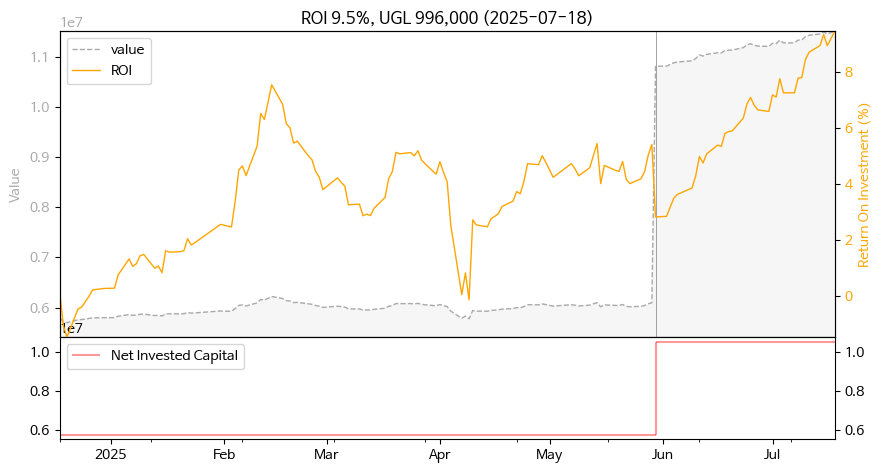

In [16]:
pf_wtr.plot(total=True)

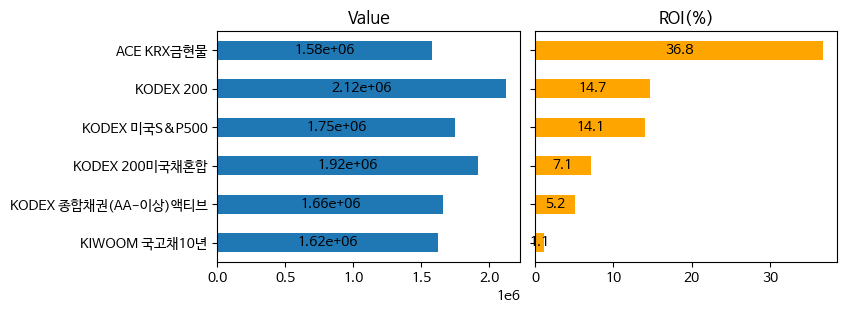

In [73]:
_ = pf_wtr.plot_assets(figsize=(8,3))

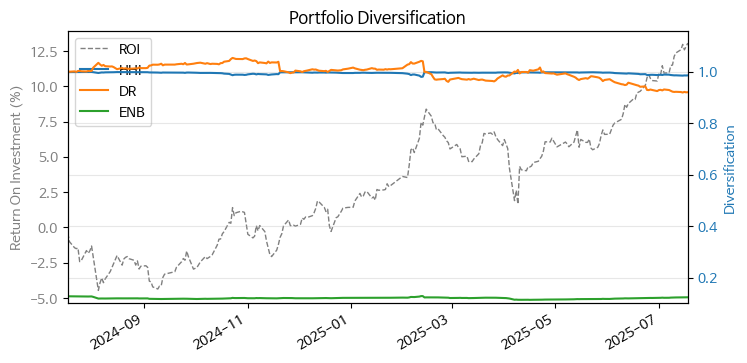

In [74]:
pf_wtr.diversification_history()

In [75]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-07-18, 10251579, 942797, 10647676, 1338895, 0.131


start    2024-07-18
end      2025-07-18
buy      10,251,579
sell        942,797
value    10,647,676
ugl       1,338,895
roi           0.131
dtype: object

In [37]:
#pf_wtr.get_cash_history(cumsum=False, date_actual=True)

In [38]:
#pf_wtr.performance_stats(metrics=METRICS)

In [76]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [77]:
capital = WidgetTransaction[1]
capital = 0.55
    
kw = dict(
    nshares = True,
    date = WidgetTransaction[0],
    capital = capital,
    save = WidgetTransaction[2],
    date_actual = date_actual
)

_ = pf_wtr.transaction_pipeline(**kw)

6 tickers selected by Selected from 2025-07-18 to 2025-07-18
Weights of tickers determined by Equal weights.
Rebalancing with contribution 55% of the portfolio value (5,860,225)
Mean absolute error of weights: 1 %
Deployed capital: 5,712,370
ROI: 8.4%, UGL: 1,336,030 (2025-07-18)
Set save=True to save transaction record


In [78]:
pf_wtr.view_record(-1, nshares=False)

name  ratio  transaction      net  weight  \
date       ticker                                                              
2025-07-18 069500             KODEX 200    1.0       606760  2730420  0.1667   
           148070         KIWOOM 국고채10년    1.0      1044270  2668690  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브    1.0      1067895  2729065  0.1667   
           284430        KODEX 200미국채혼합    1.0       830270  2748480  0.1667   
           379800        KODEX 미국S&P500    1.0       986615  2738360  0.1667   
           411060            ACE KRX금현물    1.0      1176560  2752310  0.1667   

                   weight*      date*  
date       ticker                      
2025-07-18 069500    0.167 2025-08-14  
           148070    0.163 2025-08-14  
           273130    0.167 2025-08-14  
           284430    0.168 2025-08-14  
           379800    0.167 2025-08-14  
           411060    0.168 2025-08-14

In [79]:
pf_wtr.performance_stats(-2)

,Realized,Simulated (250213),Simulated (250718)
start,2024-07-19,2022-01-03,2022-01-03
end,2025-07-18,2025-02-13,2025-07-18
total_return,0.094767,0.319245,0.344347
cagr,0.095107,0.093084,0.087252
calmar,1.530812,0.864497,0.808388
max_drawdown,-0.062129,-0.107674,-0.107934
avg_drawdown,-0.012374,-0.011704,-0.013517
avg_drawdown_days,17.166667,35.586207,36.71875
monthly_vol,0.057577,0.081321,0.073422
monthly_sharpe,1.719555,1.319944,1.357994


In [35]:
#pf_wtr.valuate(total=False)

## SRT

In [44]:
kw = dict(
    file='pf_srt_static', path=path_tran,
    universe='UV_WTR', strategy='SEQ',
    **kw_cost
)
pf_srt = PM.create_portfolio('SRT', **kw)

6 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_srt_static_250714.csv loaded


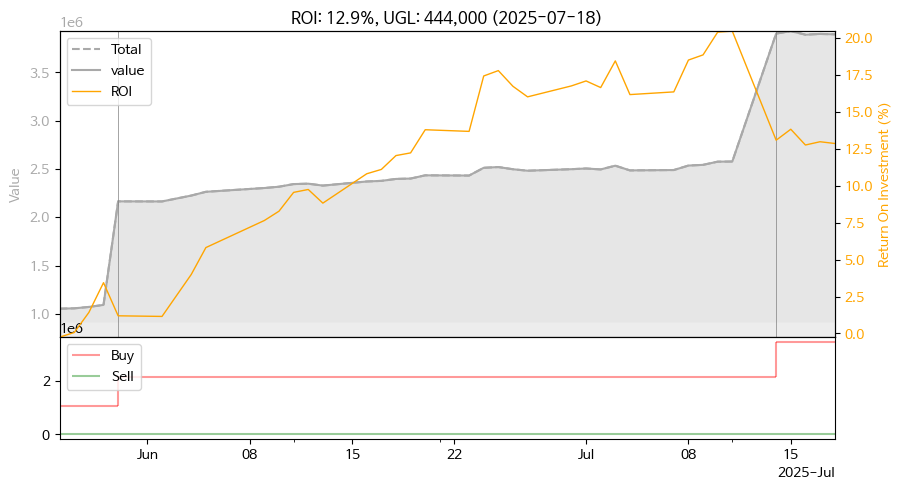

In [45]:
pf_srt.plot(total=True)

In [33]:
pf_srt.valuate(exclude_cost=True)

start    2025-05-26
end      2025-07-16
buy       3,449,580
sell            0.0
value     3,897,000
ugl         447,420
roi            0.13
dtype: object

In [5]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [25]:
#capital, date_actual = {'069500': (30, 35212)}, '2025-05-27'
#capital, date_actual = {'069500': (30, 36082)}, '2025-06-02'
capital, date_actual = {'069500': (30, 43692)}, '2025-07-15'

kw = dict(
    capital = capital,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual = date_actual,
)
_ = pf_srt.transaction_pipeline(**kw)

Deployed capital: 1,310,760
ROI: 12.8%, UGL: 440,222 (2025-07-16)
All transactions saved to pf_srt_static_250714.csv


In [34]:
pf_srt.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-05-30,069500,KODEX 200,36082,30,60,NaN,1.0,2025-06-02
2025-07-14,069500,KODEX 200,43692,30,90,NaN,1.0,2025-07-15


## SDS

In [46]:
kw = dict(
    file='pf_sds_static', path=path_tran,
    universe='UV_K200', strategy='SEQ',
    **kw_cost
)
pf_sds = PM.create_portfolio('SDS', **kw)

200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_sds_static_250714.csv loaded


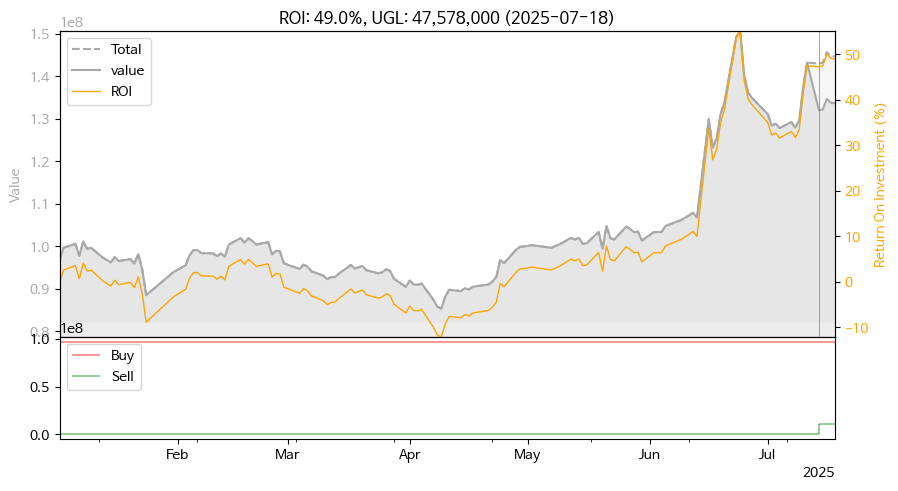

In [47]:
pf_sds.plot()

In [15]:
pf_sds.performance_stats()

,Realized,Simulated (250716)
start,2025-01-03,2022-01-03
end,2025-07-16,2025-07-16
total_return,0.461983,0.197444
cagr,1.044288,0.052343
calmar,6.417716,0.144278
max_drawdown,-0.16272,-0.362791
avg_drawdown,-0.057048,-0.138633
avg_drawdown_days,15.272727,212.5
monthly_vol,0.431038,0.285264
monthly_sharpe,2.268771,0.420581


In [7]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
#capital, date_actual = {'018260': (780, 124500)}, '2025-01-02'
capital, date_actual = {'018260': (-60, 183933)}, '2025-07-15'

kw = dict(
    capital = capital,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual = date_actual,
)
_ = pf_sds.transaction_pipeline(**kw)

Residual cash: 11,035,980
ROI: 50.0%, UGL: 48,584,555 (2025-07-16)
All transactions saved to pf_sds_static_250714.csv


In [16]:
pf_sds.view_record(-2, nshares=True)

,,name,price,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-01-02,018260,삼성에스디에스,124500,780,780,NaN,1.0,2025-01-02
2025-07-14,018260,삼성에스디에스,183933,-60,720,NaN,1.0,2025-07-15


## IRP

In [54]:
kw_st = dict(
    #security_names = fund_names # need for new assets to buy
)

In [55]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)
pf_tdf.view_record(-1)

40 securities from 2023-03-29 to 2025-07-18 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_tdf_static_250710.csv loaded


name  ratio  \
date       ticker                                                             
2025-07-10 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55105CH3411             삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55235CI9634                피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55365BT3694                kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-07-10 K55101BV9571            0   6626435     NaN    0.082 2025-07-07  
           K55105CH3411      5000000   5000000     NaN    0.062 2025-07-07  
           K55206C95800            0   5217915  0.1429    0.065 2025-07-07  
           K55213C50702      5000000  10325039  0.1429    0.128 2025-07-07  
           K55214CD4825            0   6621699     NaN    0.082 2025-07-07  
           K55234BY9966            0   4843972  0.1429    0.060 2025-07-07  
           K55234DF3150      5000000  10276143  0.1429    0.128 2025-07-07  
           K55235CI9634      5000000   5000000     NaN    0.062 2025-07-07  
           K55301BU6139      5000000  10276899  0.1429    0.128 2025-07-07  
           K55301BU6253            0   5224440  0.1429    0.065 2025-07-07  
           K55364CF7048            0   4867825  0.1429    0.060 2025-07-07  
           K55365BT3694            0   6257027     NaN    0.078 2025-07-07

In [33]:
#pf_tdf.check_universe()

In [34]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

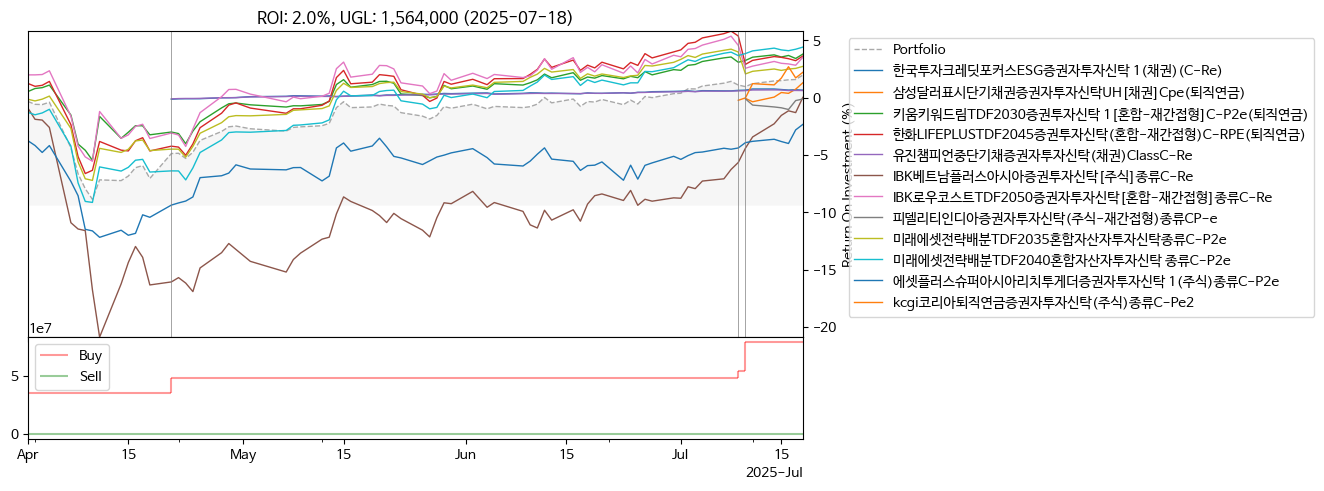

In [56]:
start = '2025-04-01'
#start = None
pf_tdf.plot(start, total=False, roi=True)

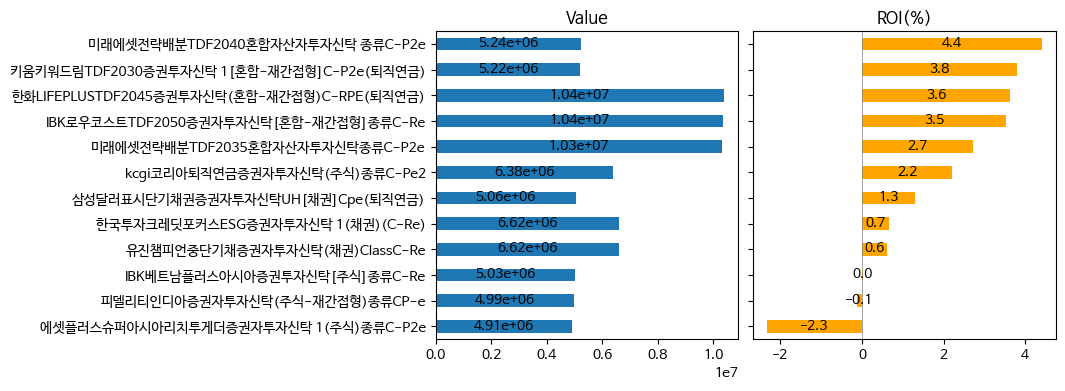

In [57]:
_ = pf_tdf.plot_assets(figsize=(8,4))

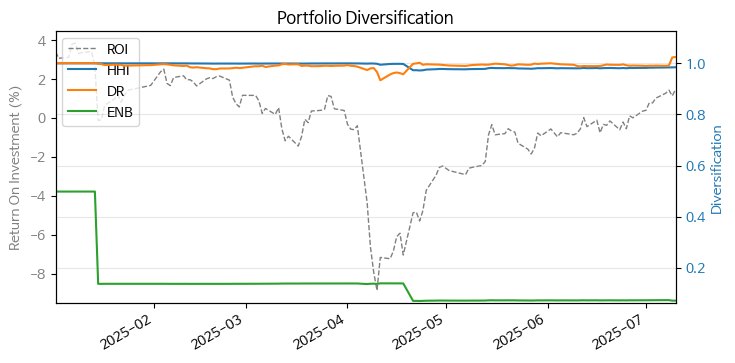

In [18]:
pf_tdf.diversification_history(start_date='2025-01-01')

In [31]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-07-16, 79392555, -170202, 80798261, 1235504, 0.0156


start    2024-06-19
end      2025-07-16
buy      79,392,555
sell       -170,202
value    80,798,261
ugl       1,235,504
roi          0.0156
dtype: object

In [32]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [ ]:
tkrs = ['K55105CH3411', 'K55223BU8809', 'K55301BX0493', 'K55235CI9634', 'K55105BU7648', 'K55301BU6139', 'K55213C50702', 'K55234DF3150']
cash = [5e6, 5e6, 5e6, 5e6, 0, 0, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 5e6, 0, 5e6, 5e6, 5e6] # 0.114441, 0.715891 for cagr & y/sharpe
#cash = [0, 5e6, 5e6, 0, 5e6, 5e6, 5e6, 5e6] # 0.105829, 0.736896
cash = [5e6, 0, 0, 5e6, 0, 5e6, 5e6, 5e6] # 0.111313, 0.684458 for cagr & y/sharpe

In [26]:
tkrs = ['K55105CH3411', 'K55235CI9634', 'K55301BU6139', 'K55213C50702', 'K55234DF3150', 'K55365BT3694']
cash = [5e6, 5e6, 5e6, 5e6, 5e6, 6243943]

In [27]:
buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

_ = [print(f'{k} {fund_names[k]}: {v:,.0f}') for k,v in zip(tkrs, cash)]
sum(buy.values())

K55105CH3411 삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금): 5,000,000
K55235CI9634 피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e: 5,000,000
K55301BU6139 미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e: 5,000,000
K55213C50702 한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금): 5,000,000
K55234DF3150 IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re: 5,000,000
K55365BT3694 kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2: 6,243,943


31243943.0

In [20]:
#buy = {'K55365BT3694':6243943} # transaction 2025-07-09
buy = {'K55301BU6139':5e6, 'K55213C50702':5e6, 'K55234DF3150':5e6, 
       'K55235CI9634':5e6, 'K55105CH3411':5e6} # transaction 2025-07-10

In [24]:
date_actual='2025-07-07'
kw = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual,
    buy = buy
)
_ = pf_tdf.transaction_halt(**kw) 

REMINDER: For the buy price, use the total amount, not the unit price.
Updated with transaction on 2025-07-10
Ticker names of None updated
All transactions saved to pf_tdf_static_250710.csv
ROI: 1.0%, UGL: 788,637 (2025-07-10)


In [25]:
pf_tdf.view_record(-1)

name  ratio  \
date       ticker                                                             
2025-07-10 K55101BV9571             한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-Re)      1   
           K55105CH3411             삼성달러표시단기채권증권자투자신탁UH[채권]Cpe(퇴직연금)      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55214CD4825                유진챔피언중단기채증권자투자신탁(채권)ClassC-Re      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55235CI9634                피델리티인디아증권자투자신탁(주식-재간접형)종류CP-e      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55365BT3694                kcgi코리아퇴직연금증권자투자신탁(주식)종류C-Pe2      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-07-10 K55101BV9571            0   6626435     NaN    0.082 2025-07-07  
           K55105CH3411      5000000   5000000     NaN    0.062 2025-07-07  
           K55206C95800            0   5217915  0.1429    0.065 2025-07-07  
           K55213C50702      5000000  10325039  0.1429    0.128 2025-07-07  
           K55214CD4825            0   6621699     NaN    0.082 2025-07-07  
           K55234BY9966            0   4843972  0.1429    0.060 2025-07-07  
           K55234DF3150      5000000  10276143  0.1429    0.128 2025-07-07  
           K55235CI9634      5000000   5000000     NaN    0.062 2025-07-07  
           K55301BU6139      5000000  10276899  0.1429    0.128 2025-07-07  
           K55301BU6253            0   5224440  0.1429    0.065 2025-07-07  
           K55364CF7048            0   4867825  0.1429    0.060 2025-07-07  
           K55365BT3694            0   6257027     NaN    0.078 2025-07-07

In [23]:
pf_tdf.performance_stats(-2, sort_by='cagr')

,Simulated (250710),Simulated (250709),Realized
start,2023-03-29,2023-03-29,2024-06-20
end,2025-07-10,2025-07-09,2025-07-10
total_return,0.346849,0.330984,0.010811
cagr,0.139292,0.133566,0.010254
calmar,1.937884,1.598694,0.077264
max_drawdown,-0.071879,-0.083547,-0.132712
avg_drawdown,-0.007703,-0.007567,-0.03447
avg_drawdown_days,11.275862,11.781818,50.142857
monthly_vol,0.052504,0.055956,0.047575
monthly_sharpe,2.416048,2.178711,0.274148


## HANA

In [5]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [6]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

40 securities from 2023-03-29 to 2025-07-09 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_hana_static_240731.csv loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [7]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

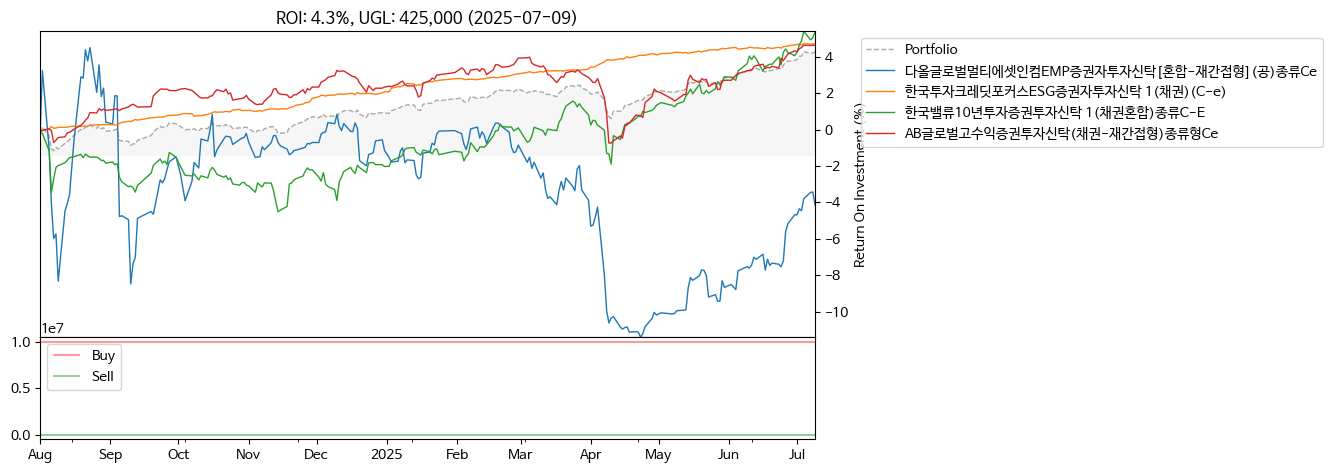

In [8]:
pf_hana.plot(total=False, roi=True)

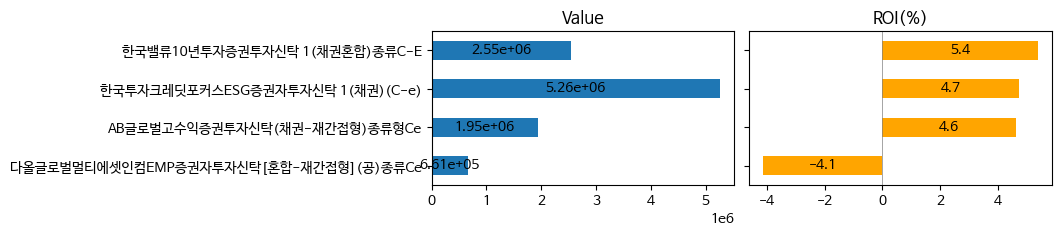

In [9]:
_ = pf_hana.plot_assets(figsize=(8,2), roi=True)

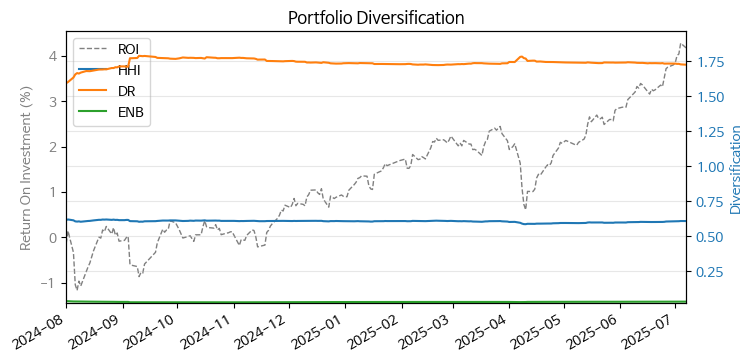

In [50]:
pf_hana.diversification_history()

In [144]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-05-08, 9990000, 0.0, 10193310, 203310, 0.0204


start    2024-08-01
end      2025-05-08
buy       9,990,000
sell            0.0
value    10,193,310
ugl         203,310
roi          0.0204
dtype: object

In [42]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [52]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
_ = pf_hana.transaction_pipeline(**kwargs)

4 tickers selected by Selected from 2023-07-07 to 2025-07-07
Weights of tickers determined by Inv.Vol.
Rebalancing with residual 0% of the portfolio value (0)
Mean absolute error of weights: 0 %
Residual cash: 0
ROI: 3.1%, UGL: 363,178 (2025-07-07)
Set save=True to save transaction record


In [53]:
pf_hana.view_record()

name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-07-07 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-07-07 K55306CV9946      -269072   403499  0.0386    0.039 2025-07-07  
           KR5101888398      1718610  6991324  0.6681    0.668 2025-07-07  
           KR5236AS4826     -1196604  1363699  0.1303    0.130 2025-07-07  
           KR5370AP9956      -252934  1705623  0.1630    0.163 2025-07-07

In [16]:
pf_hana.performance_stats()

,Realized,Simulated
start,2024-08-02,2023-03-29
end,2025-06-27,2025-06-27
total_return,0.03603,0.163141
cagr,0.040079,0.069544
calmar,2.233076,3.890154
max_drawdown,-0.017948,-0.017877
avg_drawdown,-0.003405,-0.00237
avg_drawdown_days,10.869565,9.833333
monthly_vol,0.013836,0.024964
monthly_sharpe,3.29426,2.671603


## SAVE
연금저축

In [21]:
pf = 'SAVE_2503'

In [22]:
kw_st = dict(
    #security_names = fund_names
)

In [23]:
pf_save = PM.create_portfolio(pf, **kw_st, **kw_cost)

40 securities from 2023-03-29 to 2025-07-21 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_save_static_250709.csv loaded


In [24]:
pf_save.view_record(-1)

name  ratio  \
date       ticker                                                          
2025-07-09 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-09 K55101D20874            0  1647999    0.25    0.078 2025-07-07  
           K55107BU0252            0  2013272     NaN    0.096 2025-07-07  
           K55214B30803            0  1596365     NaN    0.076 2025-07-07  
           K55236BG3274            0  7161953     NaN    0.341 2025-07-07  
           K55307DH1659      4996857  6819487    0.25    0.325 2025-07-07  
           KR5235AK9808            0  1760747    0.25    0.084 2025-07-07

In [13]:
#pf_save.portfolio_data['strategy']
#pf_save.cost
#pf_save.get_names()
pf_save.update_record()

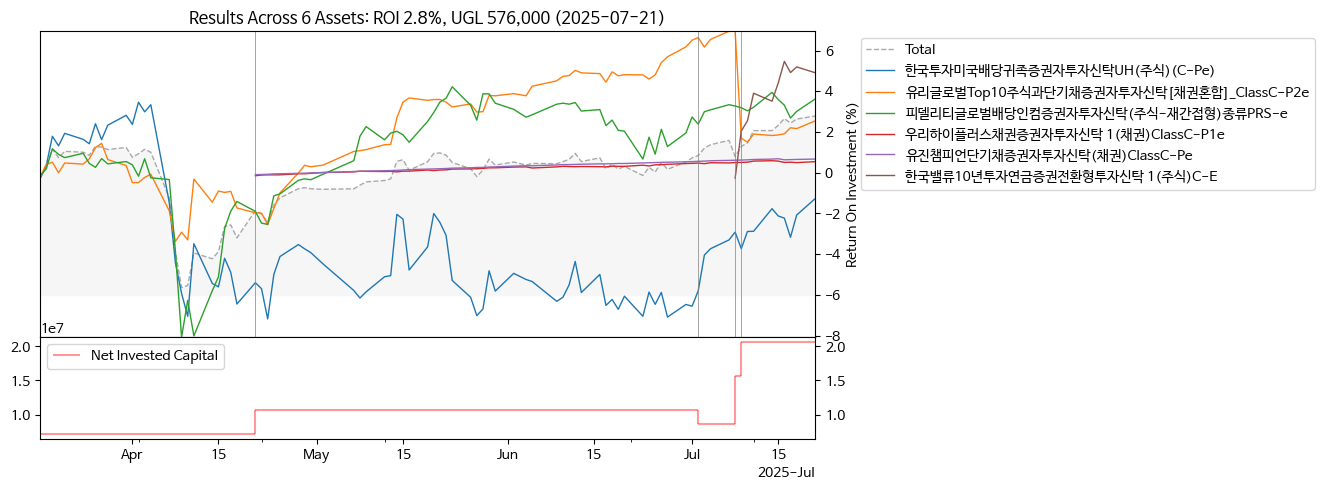

In [25]:
pf_save.plot(total=False, roi=True)

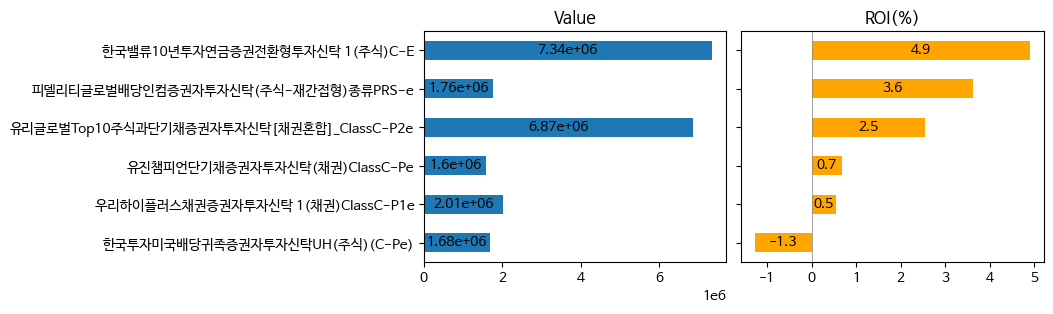

In [26]:
_ = pf_save.plot_assets(figsize=(8,3))

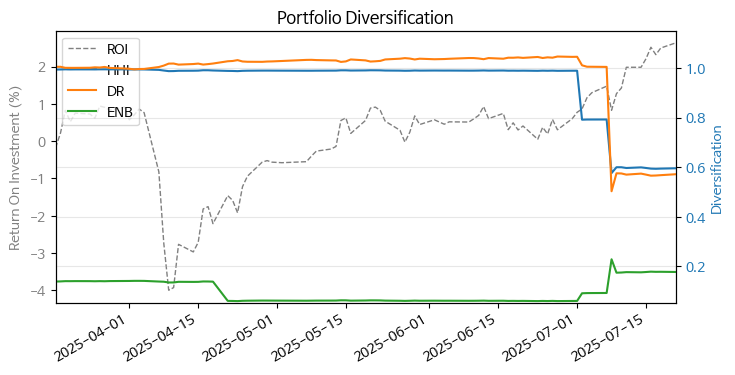

In [27]:
pf_save.diversification_history(start_date='2025-01-01')

In [26]:
date = None
pf_save.valuate(date, print_msg=True, join_str=True)
#pf_save.valuate(date, print_msg=True, int_to_str=False,total=False)

start, end, buy, sell, value, ugl, roi
2025-03-17, 2025-07-17, 22649487, 1975860, 21199396, 525769, 0.0232


start    2025-03-17
end      2025-07-17
buy      22,649,487
sell      1,975,860
value    21,199,396
ugl         525,769
roi          0.0232
dtype: object

In [28]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [29]:
date_actual='2025-07-07'

# 유리글로벌Top10, 피델리티글로벌배당인컴, 다올중국1등주, 한국밸류10년, 피델리티유럽
#tkrs = ['K55307DH1659', 'KR5235AK9808', 'K55306BT9453', 'K55236BG3274', 'KR5235AK9691']
#cash = [2e6, 2e6, 2e6, 1e7, 2e6] # y/sharpe 1.38, cagr 0.12
#cash = [5e6, 3e6, 5e6, 7e6, 0] # y/sharpe 4.3, cagr 0.11
#cash = [5e6, 2e6, 3e6, 7e6, 3e6] # y/sharpe 3.1, cagr 0.11
#buy = {k:v for k,v in zip(tkrs, cash) if v > 0}

#buy = {'K55236BG3274':7e6} # transaction '2025-07-08'
#buy = {'K55307DH1659':4996857} # transaction '2025-07-09'
buy = {'KR5235AK9808':2e6, 'K55306BT9453':3e6, 'KR5235AK9691':3e6} # transaction after '2025-07-21'

kw = dict(
    buy = buy,
    #sell = sell,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual
)
_ = pf_save.transaction_halt(**kw) 

Reminder: Use the total purchase amount based on the closing price, not the per-unit price.
Updated with transaction on 2025-07-21
Ticker names of None updated
Set save=True to save transaction record
ROI 1.9%, UGL 591,371 (2025-07-21)


In [30]:
pf_save.view_record(-1)

name  ratio  \
date       ticker                                                          
2025-07-21 K55101D20874             한국투자미국배당귀족증권자투자신탁UH(주식)(C-Pe)      1   
           K55107BU0252          우리하이플러스채권증권자투자신탁 1(채권)ClassC-P1e      1   
           K55214B30803              유진챔피언단기채증권자투자신탁(채권)ClassC-Pe      1   
           K55236BG3274             한국밸류10년투자연금증권전환형투자신탁 1(주식)C-E      1   
           K55306BT9453                  다올중국1등주증권자투자신탁[주식]종류C-Pe      1   
           K55307DH1659  유리글로벌Top10주식과단기채증권자투자신탁[채권혼합]_ClassC-P2e      1   
           KR5235AK9691               피델리티유럽증권자투자신탁(주식-재간접형)PRS-e      1   
           KR5235AK9808        피델리티글로벌배당인컴증권자투자신탁(주식-재간접형)종류PRS-e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-07-21 K55101D20874            0  1689734    0.25    0.058 2025-07-07  
           K55107BU0252            0  2015635     NaN    0.069 2025-07-07  
           K55214B30803            0  1597959     NaN    0.055 2025-07-07  
           K55236BG3274            0  7362328     NaN    0.251 2025-07-07  
           K55306BT9453      3000000  3000000     NaN    0.102 2025-07-07  
           K55307DH1659            0  6876419    0.25    0.235 2025-07-07  
           KR5235AK9691      3000000  3000000     NaN    0.102 2025-07-07  
           KR5235AK9808      2000000  3767952    0.25    0.129 2025-07-07

In [31]:
pf_save.performance_stats(-4)

,Realized,Simulated (250702),Simulated (250708),Simulated (250709),Simulated (250721)
start,2025-03-18,2023-03-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-21,2025-07-02,2025-07-08,2025-07-09,2025-07-21
total_return,0.017125,0.214078,0.302057,0.312439,0.29297
cagr,0.050869,0.089565,0.122853,0.126613,0.117465
calmar,1.039971,1.891267,1.462485,1.623577,1.328114
max_drawdown,-0.048913,-0.047357,-0.084003,-0.077984,-0.088445
avg_drawdown,-0.015954,-0.005888,-0.011087,-0.009966,-0.010988
avg_drawdown_days,27.75,13.408163,18.736842,16.690476,20.142857
monthly_vol,0.043197,0.035527,0.081013,0.069505,0.069266
monthly_sharpe,0.714089,2.29534,1.396045,1.673402,1.574068


## FISA

In [13]:
kw_st = dict(
    method_select = 'selected'    
)

In [14]:
pf_fisa = PM.create_portfolio('FISA_2504', **kw_st, **kw_cost)
pf_fisa.view_record(-1)

40 securities from 2023-03-29 to 2025-07-21 uploaded.
Master data for 329 funds loaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fisa_static_250717.csv loaded


name  ratio  \
date       ticker                                                       
2025-07-17 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-07-17 K55107BB0404            0   5067303  0.3226    0.156 2025-07-13  
           K55210CO3737            0   5416200     NaN    0.166 2025-07-13  
           KR5101888398            0  10074388  0.3226    0.309 2025-07-13  
           KR5236AS4818      5000000   8937426  0.0968    0.274 2025-07-13  
           KR5370AP9949            0   3071828     NaN    0.094 2025-07-13

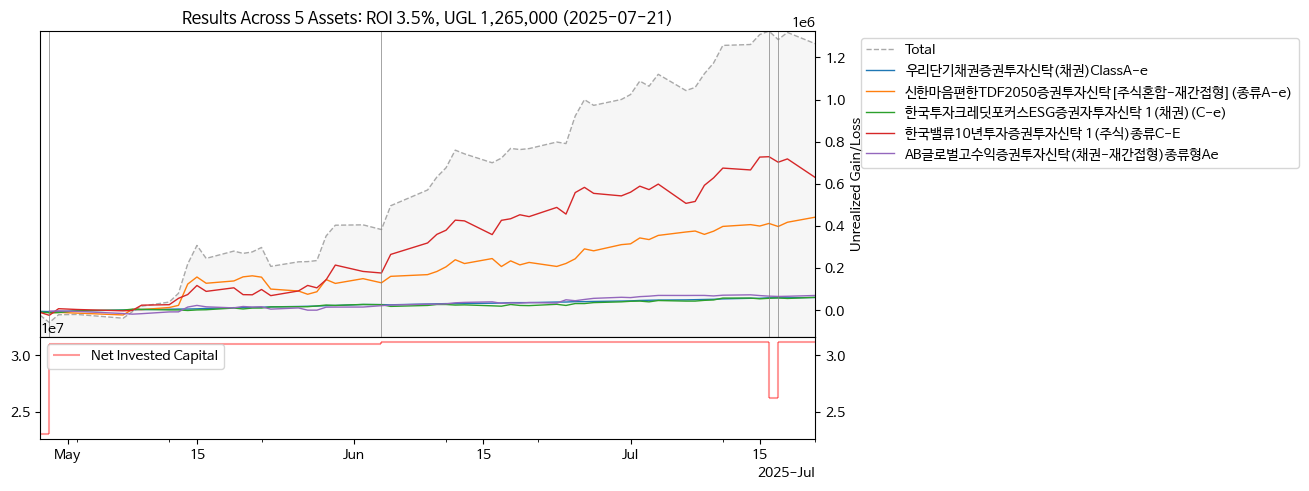

In [15]:
pf_fisa.plot(total=False, roi=False)

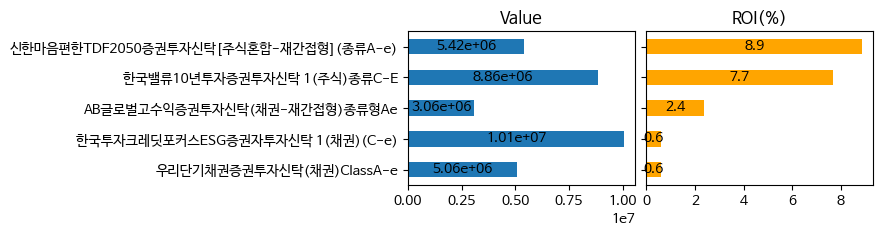

In [16]:
_ = pf_fisa.plot_assets(roi=True, figsize=(6,2))

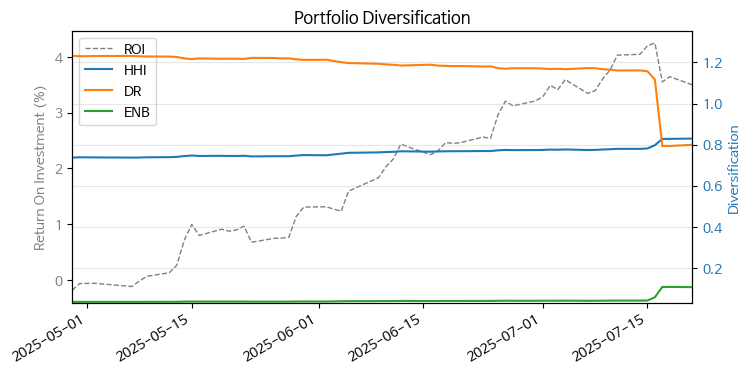

In [17]:
pf_fisa.diversification_history()

In [35]:
date = None
pf_fisa.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2025-04-28, 2025-07-16, 31176035, -14161, 32530910, 1340714, 0.043


start    2025-04-28
end      2025-07-16
buy      31,176,035
sell        -14,161
value    32,530,910
ugl       1,340,714
roi           0.043
dtype: object

In [14]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [16]:
date_actual='2025-07-13' 

#buy = {'KR5236AS4818': 10063567}
#sell = ['K55107BB0404']
#sell = {'K55107BB0404':5e6} # transaction 7-16
buy = {'KR5236AS4818':5e6} # transaction 7-17

kw = dict(
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual=date_actual,
    buy = buy,
    #sell = sell
)

_ = pf_fisa.transaction_halt(**kw) 
pf_fisa.view_record(-2)

Reminder: Use the total purchase amount based on the closing price, not the per-unit price.
Updated with transaction on 2025-07-17
All transactions saved to pf_fisa_static_250717.csv
ROI: 3.5%, UGL: 1,284,146 (2025-07-17)


name  ratio  \
date       ticker                                                       
2025-07-16 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   
2025-07-17 K55107BB0404               우리단기채권증권투자신탁(채권)ClassA-e      1   
           K55210CO3737  신한마음편한TDF2050증권투자신탁[주식혼합-재간접형](종류A-e)      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4818             한국밸류10년투자증권투자신탁 1(주식)종류C-E      1   
           KR5370AP9949           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ae      1   

                         transaction       net  weight  weight*      date*  
date       ticker                                                           
2025-07-16 K55107BB0404     -5000000   5067303  0.3226    0.184 2025-07-13  
           K55210CO3737            0   5430749     NaN    0.197 2025-07-13  
           KR5101888398            0  10072596  0.3226    0.365 2025-07-13  
           KR5236AS4818            0   3963541  0.0968    0.144 2025-07-13  
           KR5370AP9949            0   3073375     NaN    0.111 2025-07-13  
2025-07-17 K55107BB0404            0   5067303  0.3226    0.156 2025-07-13  
           K55210CO3737            0   5416200     NaN    0.166 2025-07-13  
           KR5101888398            0  10074388  0.3226    0.309 2025-07-13  
           KR5236AS4818      5000000   8937426  0.0968    0.274 2025-07-13  
           KR5370AP9949            0   3071828     NaN    0.094 2025-07-13

In [17]:
pf_fisa.performance_stats(-3)

,Realized,Simulated (250604),Simulated (250716),Simulated (250717)
start,2025-04-29,2023-03-29,2023-03-29,2023-03-29
end,2025-07-17,2025-06-04,2025-07-16,2025-07-17
total_return,0.037441,0.199181,0.274984,0.335747
cagr,0.185239,0.086691,0.111414,0.133972
calmar,27.638466,2.566609,2.64366,2.465867
max_drawdown,-0.006702,-0.033777,-0.042144,-0.054331
avg_drawdown,-0.001766,-0.003751,-0.004289,-0.006381
avg_drawdown_days,2.8,11.245283,11.0,12.388889
monthly_vol,0.027308,0.032067,0.040346,0.055003
monthly_sharpe,5.24199,2.491461,2.564541,2.251971


## ARCHIVE

### KRX
*simulation*

In [40]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

ERROR: No 'KRX'. select one of MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [ ]:
pf_krx.view_record(-2)

In [ ]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2],
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

### FXM

In [13]:
kw = dict(
    file='pf_fxm_static', path=path_tran,
    universe='UV_ETF', strategy='SEQ',
    **kw_cost
)
pf_fxm = PM.create_portfolio('FXM', **kw)

2 securities from 2016-12-27 to 2025-07-17 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_fxm_static_250716.csv loaded


In [70]:
#pf_fxm.plot()
pf_fxm.valuate()

start    2025-06-23
end      2025-07-17
buy         998,598
sell      1,018,731
value           0.0
ugl          20,133
roi          0.0202
dtype: object

In [18]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
#capital, date_actual = {'261240': (73, 13680)}, '2025-06-24'
capital, date_actual = {'261240': (-73, 13960)}, '2025-07-17'

kw = dict(
    capital = capital,
    date = WidgetTransaction[0],
    save = WidgetTransaction[2],
    date_actual = date_actual,
)
_ = pf_fxm.transaction_pipeline(**kw)

Residual cash: 1,019,080
ROI: 2.0%, UGL: 20,133 (2025-07-16)
All transactions saved to pf_fxm_static_250716.csv


In [74]:
pf_fxm.view_record(nshares=False)

,,name,ratio,transaction,net,weight,weight*,date*
date,ticker,,,,,,,
2025-06-23,261240,KODEX 미국달러선물,1.012792,998640,1011414,NaN,1.0,2025-06-24
2025-07-16,261240,KODEX 미국달러선물,0.997135,-1019080,0,NaN,NaN,2025-07-17


In [14]:
pf_fxm.performance_stats()

,Realized
start,2025-06-24
end,2025-07-17
total_return,0.024632
cagr,0.471718
calmar,51.508734
max_drawdown,-0.009158
avg_drawdown,-0.005667
avg_drawdown_days,4.5
monthly_vol,NaN
monthly_sharpe,NaN


### LIQ

In [4]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-05-27 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_liq_static_250526.csv loaded


In [5]:
pf_liq.cleanup(dry_run=True)

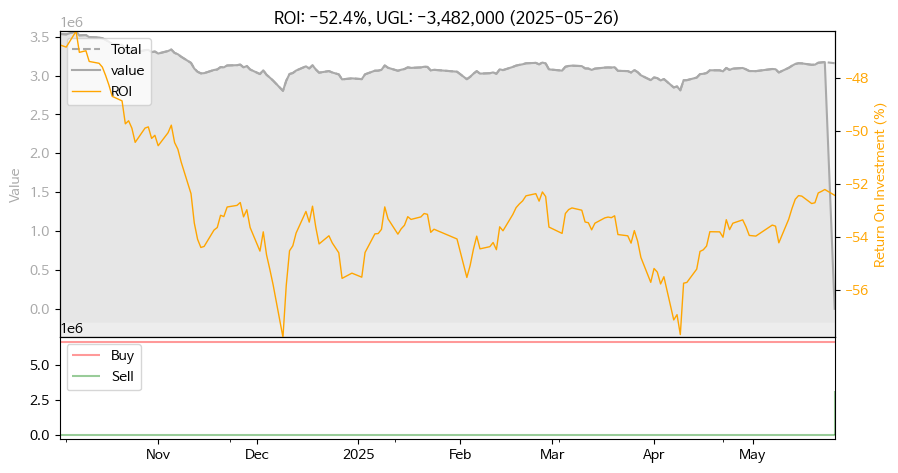

In [29]:
#date=None
date='2024-10-01'
pf_liq.plot(start_date=date)

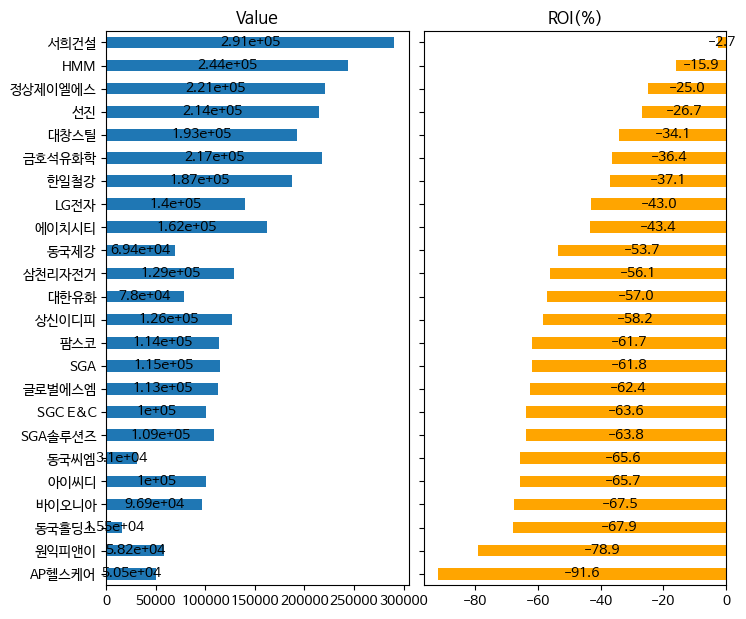

In [30]:
_ = pf_liq.plot_assets(date='2025-05-25', figsize=(8,6))

In [31]:
pf_liq.valuate()
#pf_liq.valuate(total=False).sort_values('name')

start    2024-01-03
end      2025-05-26
buy       6,641,836
sell      3,159,668
value           0.0
ugl      -3,482,168
roi          -0.524
dtype: object

In [23]:
sell = {
    '035890': 297492, '001230': 14920, '011200': 236225, '460850': 30950, '040420': 221630, '136490': 225630, 
    '460860': 66605, '140520': 194402, '006650': 79800, '066570': 137000, '002220': 186024, '011780': 224300,
    '072990': 158680, '024950': 127800, '091580': 126450, '036580': 123333, '016250': 93230, '049470': 94978,
    '900070': 114406, '184230': 107362, '040910': 99602, '064550': 96420, '217820': 58234, '109960': 50008
}
# cross-check
sum([x for x in sell.values()])

3165481

In [26]:
kw = dict(
    sell = sell, 
    date_actual = '2025-05-27',
    save = True,
)
#_ = pf_liq.transaction_halt(**kw) 

REMINDER: For the sell price, use the total amount, not the unit price.
Updated with transaction on 2025-05-26
All transactions saved to pf_liq_static_250526.csv
ROI: -52.4%, UGL: -3,482,168 (2025-05-26)


In [27]:
pf_liq.view_record(-1)

name  ratio  transaction  net  weight  weight*  \
date       ticker                                                      
2025-05-26 001230    동국홀딩스    1.0       -14920    0     NaN      NaN   
           002220     한일철강    1.0      -186024    0     NaN      NaN   
           006650     대한유화    1.0       -79800    0     NaN      NaN   
           011200      HMM    1.0      -236225    0     NaN      NaN   
           011780     금호석유    1.0      -224300    0     NaN      NaN   
           016250  SGC E&C    1.0       -93230    0     NaN      NaN   
           024950   삼천리자전거    1.0      -127800    0     NaN      NaN   
           035890     서희건설    1.0      -297492    0     NaN      NaN   
           036580      팜스코    1.0      -123333    0     NaN      NaN   
           040420  정상제이엘에스    1.0      -221630    0     NaN      NaN   
           040910     아이씨디    1.0       -99602    0     NaN      NaN   
           049470      SGA    1.0       -94978    0     NaN      NaN   
           064550    바이오니아    1.0       -96420    0     NaN      NaN   
           066570     LG전자    1.0      -137000    0     NaN      NaN   
           072990    에이치시티    1.0      -158680    0     NaN      NaN   
           091580    상신이디피    1.0      -126450    0     NaN      NaN   
           109960   AP헬스케어    1.0       -50008    0     NaN      NaN   
           136490       선진    1.0      -225630    0     NaN      NaN   
           140520     대창스틸    1.0      -194402    0     NaN      NaN   
           184230  SGA솔루션즈    1.0      -107362    0     NaN      NaN   
           217820    원익피앤이    1.0       -58234    0     NaN      NaN   
           460850     동국씨엠    1.0       -30950    0     NaN      NaN   
           460860     동국제강    1.0       -66605    0     NaN      NaN   
           900070   글로벌에스엠    1.0      -114406    0     NaN      NaN   

                       date*  
date       ticker             
2025-05-26 001230 2025-05-27  
           002220 2025-05-27  
           006650 2025-05-27  
           011200 2025-05-27  
           011780 2025-05-27  
           016250 2025-05-27  
           024950 2025-05-27  
           035890 2025-05-27  
           036580 2025-05-27  
           040420 2025-05-27  
           040910 2025-05-27  
           049470 2025-05-27  
           064550 2025-05-27  
           066570 2025-05-27  
           072990 2025-05-27  
           091580 2025-05-27  
           109960 2025-05-27  
           136490 2025-05-27  
           140520 2025-05-27  
           184230 2025-05-27  
           217820 2025-05-27  
           460850 2025-05-27  
           460860 2025-05-27  
           900070 2025-05-27

## TEST

In [41]:
tkrs = ['K55303CK1428', 'KR5207AW8081']

In [42]:
PM.review_portfolio('TDF_2406',strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally', 'unit_fund': True}

In [43]:
kw_st = dict(
    tickers = tkrs,
    file = 'pf_test'
)
pf_test = PM.create_portfolio('TDF_2406', **kw_st, **kw_cost)

288 securities from 2023-03-27 to 2025-04-23 uploaded.
Master data for 300 funds loaded.
Price data loaded
Cost data transaction_cost_250424.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [45]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [50]:
kwargs = dict(
    date = WidgetTransaction[0],
    capital = WidgetTransaction[1],
    save = WidgetTransaction[2]
)
_ = pf_test.transaction_pipeline(**kwargs)
pf_test.view_record()

2 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.7%, UGL: 168,854 (2025-04-23)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2025-01-31 K55303CK1428                마이다스우량채권증권자투자신탁 1(채권)Ce      1   
           KR5207AW8081  교보악사Tomorrow장기우량증권투자신탁K -1(채권)ClassCE      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55303CK1428      5000000  5000000     0.5      0.5 2025-01-31  
           KR5207AW8081      5000000  5000000     0.5      0.5 2025-01-31

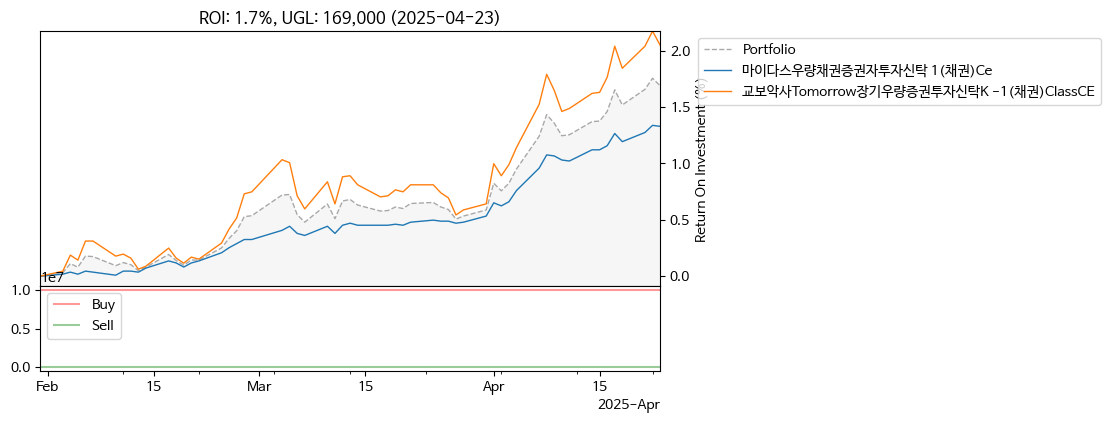

In [51]:
pf_test.plot(total=False, roi=True, figsize=(8,5))

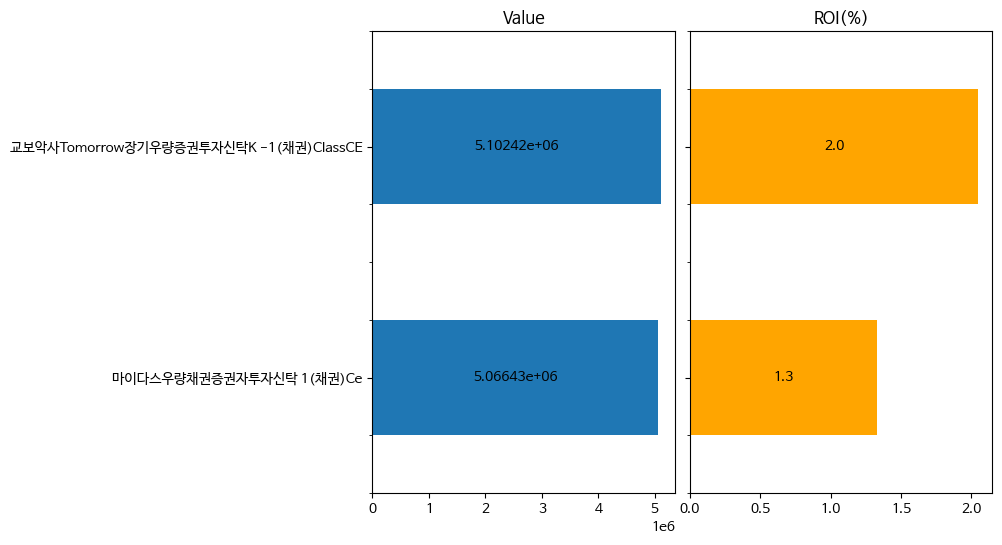

In [52]:
_ = pf_test.plot_assets(figsize=(8,6))

# testing

In [19]:
pfs = ['MMT', 'PER', 'WTR']
pm = PM(*pfs, **kw_cost)

MMT_2407:
200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_momentum_250716.csv loaded

PER_2410:
200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per_241112.csv loaded
Run check_universe to get the list of missing assets

PER_2505:
200 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_k200_per2_250512.csv loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250214.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-07-18 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr2412_static_250530.csv lo

In [22]:
pm.set_benchmark('069500')

069500 set as benchmark


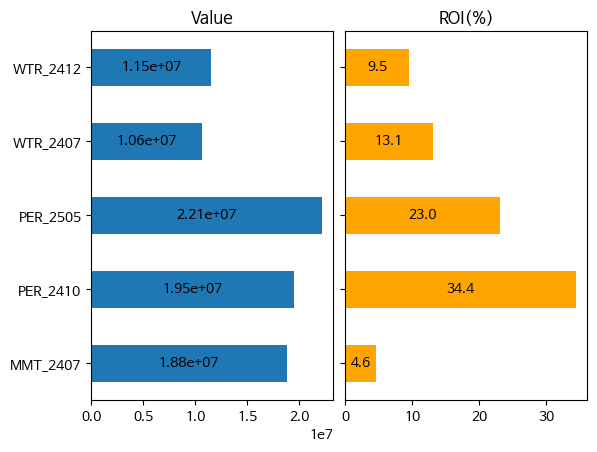

In [10]:
pm.summary(plot=True)

In [17]:
pm.summary(category=)

portfolio,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,TOTAL
start,2024-07-22,2024-10-17,2025-05-09,2024-07-18,2024-12-18,2024-07-18
end,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18
buy,"77,796,016","16,472,520","17,985,251","10,251,579","10,516,562","133,021,929"
sell,"62,583,405","2,617,050",0.0,"942,797",0.0,"66,143,252"
value,"18,786,648","19,521,902","22,129,663","10,647,673","11,512,500","82,598,386"
ugl,"3,574,036","5,666,432","4,144,412","1,338,892","995,938","15,719,709"
roi,0.0459,0.344,0.23,0.131,0.0947,0.118


In [80]:
from pf_utils import format_price, PortfolioBuilder, get_date_minmax, METRICS2
import pandas as pd
from pf_utils import sort_dataframe
from pf_utils import performance_stats as ps_ori



def summary(self, *pf_names, date=None, 
            int_to_str=True, category=None, exclude_cost=False, sort_by=None, 
            plot=False, roi=True, figsize=None, date_format='%Y-%m-%d'):
    """
    get cashflow & pnl of groups in category (default portfolio) on date
    """       
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None
    # history not supported in summary
    date = None if date == 'all' else date
    nms_v = self.names_vals
    nm_ttl = nms_v['ttl']
    nm_start = nms_v['start']
    nm_end = nms_v['end']
    nm_roi = nms_v['roi']
    nm_ugl = nms_v['ugl']
    nm_buy = nms_v['buy']

    df_val = self._valuate(*pf_names, date=date, category=category, exclude_cost=exclude_cost)
    df_val = df_val.sort_values(sort_by, ascending=True) if sort_by in df_val.columns else df_val
    idx_val = df_val.index
    
    df_bm = self.df_benchmark
    if df_bm is not None:
        bm_start, bm_end = get_date_minmax(df_bm, date_format)
        bm_buy = df_val['buy'].sub(df_val['sell']).sum()
        bm_value = bm_buy / df_bm.iloc[0] * df_bm.iloc[-1]
        bm_ugl = bm_value - bm_buy
        bm_roi = bm_ugl / bm_buy
        df_val.loc[df_bm.name] = [bm_start, bm_end, bm_buy, 0, bm_value, bm_ugl, bm_roi] 
    
    if plot:
        category = df_val.index.name # reset category according to result df_val
        df_val = df_val.reset_index()
        axes = PortfolioBuilder._plot_assets(df_val, col_name=category, roi=roi, figsize=figsize)
        return None
    else:
        # set total
        df_valt = df_val.loc[idx_val].T
        df_valt[nm_ttl] = [df_valt.loc[nm_start].min(), df_valt.loc[nm_end].max(), 
                             *df_valt.iloc[2:].sum(axis=1).to_list()]
        df_ttl = df_valt[nm_ttl]
        df_valt.loc[nm_roi, nm_ttl] = df_ttl[nm_ugl] / df_ttl[nm_buy]
        if df_bm is not None:
            df_valt = pd.concat([df_valt, df_val.loc[df_bm.name]], axis=1)
        return df_valt.map(format_price, digits=0) if int_to_str else df_valt



def performance_stats(self, *pf_names, date=None, simulation=False,
                      metrics=METRICS2, sort_by=None, exclude_cost=False):
    """
    compare performance stats of portfolios with 2 different methods
    date: date for fixed weights of simulated performance
    column: 'Realized' for stats of actual portfolio,
             see ProtfolioBuilder.performance_stats for details
    """
    # check portfolios
    pf_names = self.check_portfolios(*pf_names)
    if len(pf_names) == 0:
        return None
        
    if simulation:
        i = -1
        msg = 'Simulated performance using the most recent transaction weights'
    else:
        i = 0
        msg = 'Actual performance'
                
    # get data from each portfolio
    df_all, no_res = None, []
    for name in pf_names:
        pf = self.portfolios[name]
        df = pf.performance_stats(date=date, metrics=metrics, exclude_cost=exclude_cost)
        if df is None:
            no_res.append(name)
        else: # add portfolio name
            if simulation and df.columns.size == 1: # no simulated for pf with no position
                no_res.append(name)
            else:
                df = df.iloc[:, i].rename(name)
            df_all = df if df_all is None else pd.concat([df_all, df], axis=1) 

    df_all = sort_dataframe(df_all, sort_by, axis=1, ascending=False)
    
    df_bm = self.df_benchmark
    if df_bm is not None:
        #df = performance_stats(df_bm.to_frame(), metrics=metrics)
        df = ps_ori(df_bm.to_frame(), metrics=metrics) # TODO: delete this line when uncommenting the above line
        df_all = pd.concat([df_all, df], axis=1)
    
    print(f"WARNING: Check portfolios {', '.join(no_res)}") if len(no_res) > 0 else None
    print(f'Returning {msg}:')
    return df_all
    
    



In [82]:
performance_stats(pm, simulation=True)

Tickers 009900, 016380 added to universe
Tickers 001740, 178920 added to universe
Returning Simulated performance using the most recent transaction weights:


,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,BM
start,2022-01-03,2022-01-03,2022-01-03,2022-01-03,2022-01-03,2024-07-18
end,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18
total_return,5.383003,0.795388,0.427898,0.326294,0.342871,0.134882
cagr,0.688813,0.179915,0.105944,0.083105,0.086915,0.13498
calmar,2.227675,0.62501,0.371477,0.71334,0.770233,0.681395
max_drawdown,-0.309207,-0.28786,-0.285196,-0.116501,-0.112842,-0.198094
avg_drawdown,-0.064542,-0.04585,-0.061389,-0.013704,-0.013217,-0.041873
avg_drawdown_days,27.581395,33.333333,73.588235,35.727273,34.558824,57.0
monthly_vol,0.40035,0.203929,0.21267,0.076968,0.075962,0.198647
monthly_sharpe,1.671981,1.009688,0.675135,1.259642,1.319088,0.8334


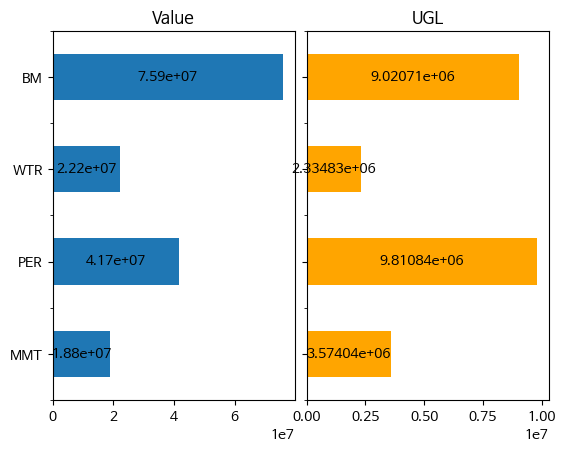

In [63]:
summary(pm, plot=True, roi=False, category='portfolio2')

In [59]:
summary(pm, plot=False)

,MMT_2407,PER_2410,PER_2505,WTR_2407,WTR_2412,TOTAL,BM
start,2024-07-22,2024-10-17,2025-05-09,2024-07-18,2024-12-18,2024-07-18,2024-07-18
end,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18,2025-07-18
buy,"77,796,016","16,472,520","17,985,251","10,251,579","10,516,562","133,021,929","66,878,677"
sell,"62,583,405","2,617,050",0.0,"942,797",0.0,"66,143,252",0.0
value,"18,786,648","19,521,902","22,129,663","10,647,673","11,512,500","82,598,386","75,899,391"
ugl,"3,574,036","5,666,432","4,144,412","1,338,892","995,938","15,719,709","9,020,714"
roi,0.0459,0.344,0.23,0.131,0.0947,0.118,0.135


# testing

In [120]:
from pf_utils import PortfolioManager, PortfolioBuilder, format_price, DataManager, get_date_minmax, performance_stats, METRICS2
from pf_utils import sort_dataframe
import pandas as pd

class PortfolioManager(PortfolioManager):
    
    def summary(self, *pf_names, date=None, 
                int_to_str=True, category=None, exclude_cost=False, sort_by=None, 
                plot=False, roi=True, figsize=None, bm_capital='mean'):
        """
        get cashflow & pnl of groups in category (default portfolio) on date
        """       
        pf_names = self.check_portfolios(*pf_names)
        if len(pf_names) == 0:
            return None
        # history not supported in summary
        date = None if date == 'all' else date
        nms_v = self.names_vals
        nm_ttl = nms_v['ttl']
        nm_start = nms_v['start']
        nm_end = nms_v['end']
        nm_roi = nms_v['roi']
        nm_ugl = nms_v['ugl']
        nm_buy = nms_v['buy']
    
        df_val = self._valuate(*pf_names, date=date, category=category, exclude_cost=exclude_cost)
        if plot:
            category = df_val.index.name # reset category according to result df_val
            df_val = df_val.reset_index()
            n_ori = len(df_val)
            df_val = df_val.sort_values(sort_by, ascending=True) if sort_by in df_val.columns else df_val
            df_val = self._get_benchmark(df_val, option=0, capital=bm_capital) # add benchmark
            axes = PortfolioBuilder._plot_assets(df_val, col_name=category, roi=roi, figsize=figsize)
            # Set transparency of the Benchmark
            if len(df_val) > n_ori:
                for ax in axes:
                    bars = ax.patches
                    bars[-1].set_alpha(0.3)
            return None
        else:
            # set total
            df_val = df_val.T
            df_val[nm_ttl] = [df_val.loc[nm_start].min(), df_val.loc[nm_end].max(), 
                                 *df_val.iloc[2:].sum(axis=1).to_list()]
            df_ttl = df_val[nm_ttl]
            df_val.loc[nm_roi, nm_ttl] = df_ttl[nm_ugl] / df_ttl[nm_buy]
            df_val = self._get_benchmark(df_val, option=1, capital=bm_capital) # add benchmark
            return df_val.map(format_price, digits=0) if int_to_str else df_val


    def performance_stats(self, *pf_names, date=None, simulation=False,
                          metrics=METRICS2, sort_by=None, exclude_cost=False):
        """
        compare performance stats of portfolios with 2 different methods
        date: date for fixed weights of simulated performance
        column: 'Realized' for stats of actual portfolio,
                 see ProtfolioBuilder.performance_stats for details
        """
        # check portfolios
        pf_names = self.check_portfolios(*pf_names)
        if len(pf_names) == 0:
            return None
            
        if simulation:
            i = -1
            msg = 'Simulated performance using the most recent transaction weights'
        else:
            i = 0
            msg = 'Actual performance'
                    
        # get data from each portfolio
        df_all, no_res = None, []
        for name in pf_names:
            pf = self.portfolios[name]
            df = pf.performance_stats(date=date, metrics=metrics, exclude_cost=exclude_cost)
            if df is None:
                no_res.append(name)
            else: # add portfolio name
                if simulation and df.columns.size == 1: # no simulated for pf with no position
                    no_res.append(name)
                else:
                    df = df.iloc[:, i].rename(name)
                df_all = df if df_all is None else pd.concat([df_all, df], axis=1) 
        df_all = self._get_benchmark(df_all, option=2, metrics=metrics) 
        print(f"WARNING: Check portfolios {', '.join(no_res)}") if len(no_res) > 0 else None
        print(f'Returning {msg}:')
        return sort_dataframe(df_all, sort_by, axis=1, ascending=False)


    
    def set_benchmark(self, ticker, start_date=None, end_date=None, 
                      name='BM', date_format='%Y-%m-%d'):
        """
        ticker: ticker to compare with portfolios
        """
        df_all = self.util_performance_by_asset(date='all')
        if df_all is None:
            return
        if start_date is None:
            start_date = df_all.index.min().strftime(date_format)
        if end_date is None:
            end_date = df_all.index.max().strftime(date_format)
        df_benchmark = DataManager.download_fdr(ticker, start_date, end_date)
        if df_benchmark is None:
            return None
        self.df_benchmark = df_benchmark.iloc[:, 0].rename(name)
        return print(f'{ticker} set as benchmark')

    
    def _get_benchmark(self, df_value, option=0, capital='mean', 
                       metrics=None, date_format='%Y-%m-%d'):
        """
        capital: init capital for benchmark as a portfolio. 
                'mean', 'max', 'mean' or 'total' of all portfolios
        """
        df_bm = self.df_benchmark
        if df_bm is None:
            print('WARNING: Run set_benchmark first to compare with benchmark')
            return df_value

        nms_v = self.names_vals
        nm_buy = nms_v['buy']
        nm_sell = nms_v['sell']
        nm_ttl = nms_v['ttl']
        nm_start = nms_v['start']
        nm_end = nms_v['end']

        def get_buy(buy, option=capital):
            if option=='mean':
                return buy.mean()
            elif option=='min':
                return buy.min()
            elif option=='max':
                return buy.max()
            else: # 'total'
                return buy.sum()

        def value_ugl_roi(buy, df):
            value = buy / df.iloc[0] * df.iloc[-1]
            ugl = value - buy
            roi = ugl / buy
            return [value, ugl, roi]

        if option == 0: # self.summary with plot=True
            # slice benchmark data
            df_bm = df_bm.loc[df_value[nm_start].min():df_value[nm_end].max()]
            # get stats of benchmark and add to result of portfolios
            start, end = get_date_minmax(df_bm, date_format)
            buy = get_buy(df_value[nm_buy].sub(df_value[nm_sell]))
            bm_list = [df_bm.name, start, end, buy, 0, *value_ugl_roi(buy, df_bm)]
            df_value.loc[df_value.index.max()+1] = bm_list
        elif option == 1: # self.summary with plot=False
            # slice benchmark data
            df_bm = df_bm.loc[df_value.loc[nm_start].min():df_value.loc[nm_end].max()]
            # get stats of benchmark and add to result of portfolios
            start, end = get_date_minmax(df_bm, date_format)
            cols = df_value.columns.difference([nm_ttl])
            df_val = df_value[cols]
            buy = get_buy(df_val.loc[nm_buy].sub(df_val.loc[nm_sell]))
            bm_list = [start, end, buy, 0, *value_ugl_roi(buy, df_bm)]
            sr_bm = pd.Series(bm_list, index=df_val.index).rename(df_bm.name) 
            df_value = pd.concat([df_value, sr_bm], axis=1)
        else: # self.performance_stats
            # slice benchmark data
            df_bm = df_bm.loc[df_value.loc[nm_start].min():df_value.loc[nm_end].max()]
            # get stats of benchmark and add to result of portfolios
            start, end = get_date_minmax(df_bm, date_format)
            df = performance_stats(df_bm.to_frame(), metrics=metrics)
            df_value = pd.concat([df_value, df], axis=1)

        return df_value


In [121]:
#pfs = ['MMT', 'PER', 'WTR']
pfs = ['WTR']
pm = PortfolioManager(*pfs, **kw_cost)

WTR_2407:
6 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr_static_250214.csv loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-07-21 uploaded.
Price data loaded
Cost data transaction_cost_250707.csv loaded
Transaction record pf_wtr2412_static_250530.csv loaded



In [122]:
pm.set_benchmark('069500', '2020-01-01')

069500 set as benchmark


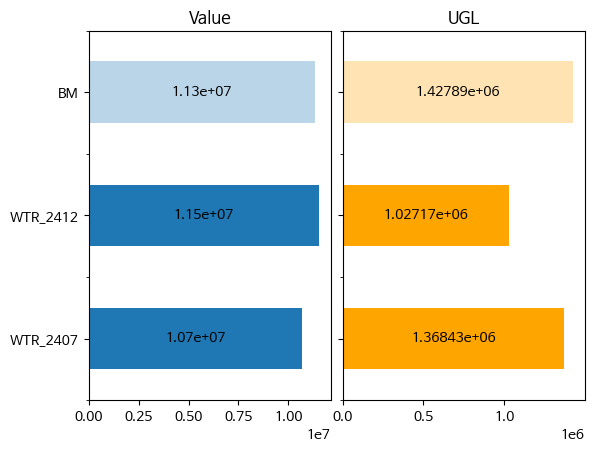

In [123]:
axes = pm.summary(plot=True, roi=False, bm_capital='mean')

In [124]:
pm.summary(bm_capital='mean')

,WTR_2407,WTR_2412,TOTAL,BM
start,2024-07-18,2024-12-18,2024-07-18,2024-07-18
end,2025-07-21,2025-07-21,2025-07-21,2025-07-21
buy,"10,251,579","10,516,562","20,768,141","9,912,672"
sell,"942,797",0.0,"942,797",0
value,"10,677,216","11,543,728","22,220,944","11,340,560"
ugl,"1,368,435","1,027,166","2,395,600","1,427,888"
roi,0.133,0.0977,0.115,0.144


In [126]:
pm.performance_stats(simulation=True)

Returning Simulated performance using the most recent transaction weights:


,WTR_2407,WTR_2412,BM
start,2022-01-03,2022-01-03,2022-01-03
end,2025-07-21,2025-07-21,2025-07-21
total_return,0.329984,0.346587,0.185585
cagr,0.083753,0.087552,0.049186
calmar,0.718511,0.775558,0.175908
max_drawdown,-0.116565,-0.112889,-0.279612
avg_drawdown,-0.013725,-0.013237,-0.052335
avg_drawdown_days,35.757576,34.588235,114.909091
monthly_vol,0.077291,0.07628,0.19937
monthly_sharpe,1.265089,1.324368,0.479934
